# STAT 430 Final Project Report 
# Jaeseung Lee

# 0. Introduction

## 0.1 Goal of Analysis

The main goal of my final project is to apply unsupervised learning data analysis that I will perform on credit card dataset. By analyzing credit card dataset, I can help to develop a customer segmentation to define marketing strategy.

## 0.2 Motivation

As COVID pandamic started, people are required to do quarantine to prevent the spread of COVID. According to the article written by James Melton, "US consumers made almost 63 million online grocery oredrs in November" (James Melton|Dec 10 et al.) The monthly active customer numbers keep increasing and the frequency of online-order also rises. Therfore, e-commerce company and credit card company may have more transction data or customer data compared to the before pandamic which can be used to customer segmentation. 

From the Intercom article, customer segmentation is the process of grouping customers together based on common characteristics (McEntee Editor et al.) When there are customer group, marketers and business developer can make efficient customized strategy for each group. To be specific, recommend new grocery to other customers in same group or find inactive users and offer new deals to them. 

Additionaly, this type of behavior data set also can be used in game. There are one story written by game data scientist, "Clustering is imminently useful for categorizing your players and for getting an overall idea about the variance in player behavior and how behavior is organized, but also for detailed analysis" (Anders Drachen). This enable to find user use hack.

There are more advantages of using unsupervised algorithms in this kind of data. 

## 0.3 Dataset Information

Unfortunately, there were not any information regarding how the dataset was collected and whay type of preprocessing that was conducted on my dataset.

Here is the source of the data:
https://www.kaggle.com/arjunbhasin2013/ccdata

# 1. Data Preparation

## 1.1 Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('fivethirtyeight')

from scipy.stats import norm 
from scipy.spatial.distance import pdist, squareform
from pyclustertend import hopkins

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabaz_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

## 1.2 Load Dataset

In [2]:
df = pd.read_csv("CC GENERAL.csv")

## 1.3 Descriptions of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

The dataset summarizes the usage behavior of about 9000 activate credit card holders during the last 6 months.
There are 18 variables as follows:
- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases 
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user
    

## 1.4 Exploratory Data Analysis

In [4]:
df.head()
df.tail()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

As you see on the first 5 rows and last 5 rows, it seems like there are missing values in minimum payments variable

### Summary of Data

In [5]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

On the count row, all of the values except credit limit and minimum payments are counted 8950.

### Checking Missing Values

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Mimimum payment has 313 NA values, and credit limit has 1 NA value.

### Plotting two columns with boxplot to check outliers

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fed920d8d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed920f5358>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed920d8c88>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed920f5908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed920f5be0>],
 'means': []}

Text(0.5, 1.0, 'CREDIT_LIMIT')

<AxesSubplot:>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fed96ecd7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed96ecdda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed96ecd588>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed96ee2390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed96ee2668>],
 'means': []}

Text(0.5, 1.0, 'MINIMUM_PAYMENTS')

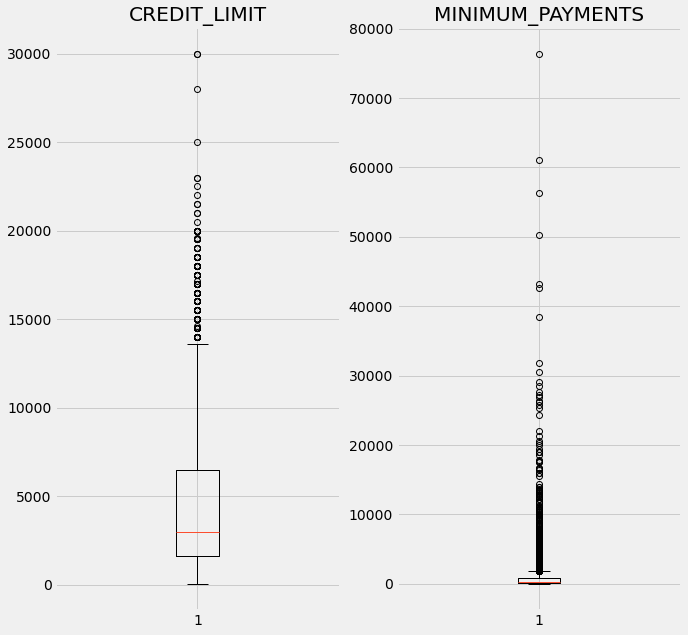

In [7]:
plt.figure(figsize=(10,10))
na_col = ["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]

for i in range(0,2):
    plt.subplot(1,2, i + 1)
    plt.boxplot(df[na_col[i]].dropna())
    plt.title(na_col[i])

Comparing these two columns that have missing values, as there are too many outliers in MIMIMUM_PAYMENTS, I will drop rows with NA. It is too risky to replace NA with other values.
But I can replace 1 NA values in CREDIT_LIMIT with mean of this column

### Dealing with outliers

In [8]:
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
df = df.dropna()

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now, there are no NA values.

For the clustering, we don't need id of the customer, only use 17 variables except the id of customers.

In [10]:
X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

### Plotting density distrbution for overall columns

<Figure size 1800x1800 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='BALANCE'>

Text(0.5, 1.0, 'Distplot of BALANCE')

<AxesSubplot:>

<AxesSubplot:xlabel='BALANCE_FREQUENCY'>

Text(0.5, 1.0, 'Distplot of BALANCE_FREQUENCY')

<AxesSubplot:>

<AxesSubplot:xlabel='PURCHASES'>

Text(0.5, 1.0, 'Distplot of PURCHASES')

<AxesSubplot:>

<AxesSubplot:xlabel='ONEOFF_PURCHASES'>

Text(0.5, 1.0, 'Distplot of ONEOFF_PURCHASES')

<AxesSubplot:>

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES'>

Text(0.5, 1.0, 'Distplot of INSTALLMENTS_PURCHASES')

<AxesSubplot:>

<AxesSubplot:xlabel='CASH_ADVANCE'>

Text(0.5, 1.0, 'Distplot of CASH_ADVANCE')

<AxesSubplot:>

<AxesSubplot:xlabel='PURCHASES_FREQUENCY'>

Text(0.5, 1.0, 'Distplot of PURCHASES_FREQUENCY')

<AxesSubplot:>

<AxesSubplot:xlabel='ONEOFF_PURCHASES_FREQUENCY'>

Text(0.5, 1.0, 'Distplot of ONEOFF_PURCHASES_FREQUENCY')

<AxesSubplot:>

<AxesSubplot:xlabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

Text(0.5, 1.0, 'Distplot of PURCHASES_INSTALLMENTS_FREQUENCY')

<AxesSubplot:>

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY'>

Text(0.5, 1.0, 'Distplot of CASH_ADVANCE_FREQUENCY')

<AxesSubplot:>

<AxesSubplot:xlabel='CASH_ADVANCE_TRX'>

Text(0.5, 1.0, 'Distplot of CASH_ADVANCE_TRX')

<AxesSubplot:>

<AxesSubplot:xlabel='PURCHASES_TRX'>

Text(0.5, 1.0, 'Distplot of PURCHASES_TRX')

<AxesSubplot:>

<AxesSubplot:xlabel='CREDIT_LIMIT'>

Text(0.5, 1.0, 'Distplot of CREDIT_LIMIT')

<AxesSubplot:>

<AxesSubplot:xlabel='PAYMENTS'>

Text(0.5, 1.0, 'Distplot of PAYMENTS')

<AxesSubplot:>

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

Text(0.5, 1.0, 'Distplot of MINIMUM_PAYMENTS')

<AxesSubplot:>

<AxesSubplot:xlabel='PRC_FULL_PAYMENT'>

Text(0.5, 1.0, 'Distplot of PRC_FULL_PAYMENT')

<AxesSubplot:>

<AxesSubplot:xlabel='TENURE'>

Text(0.5, 1.0, 'Distplot of TENURE')

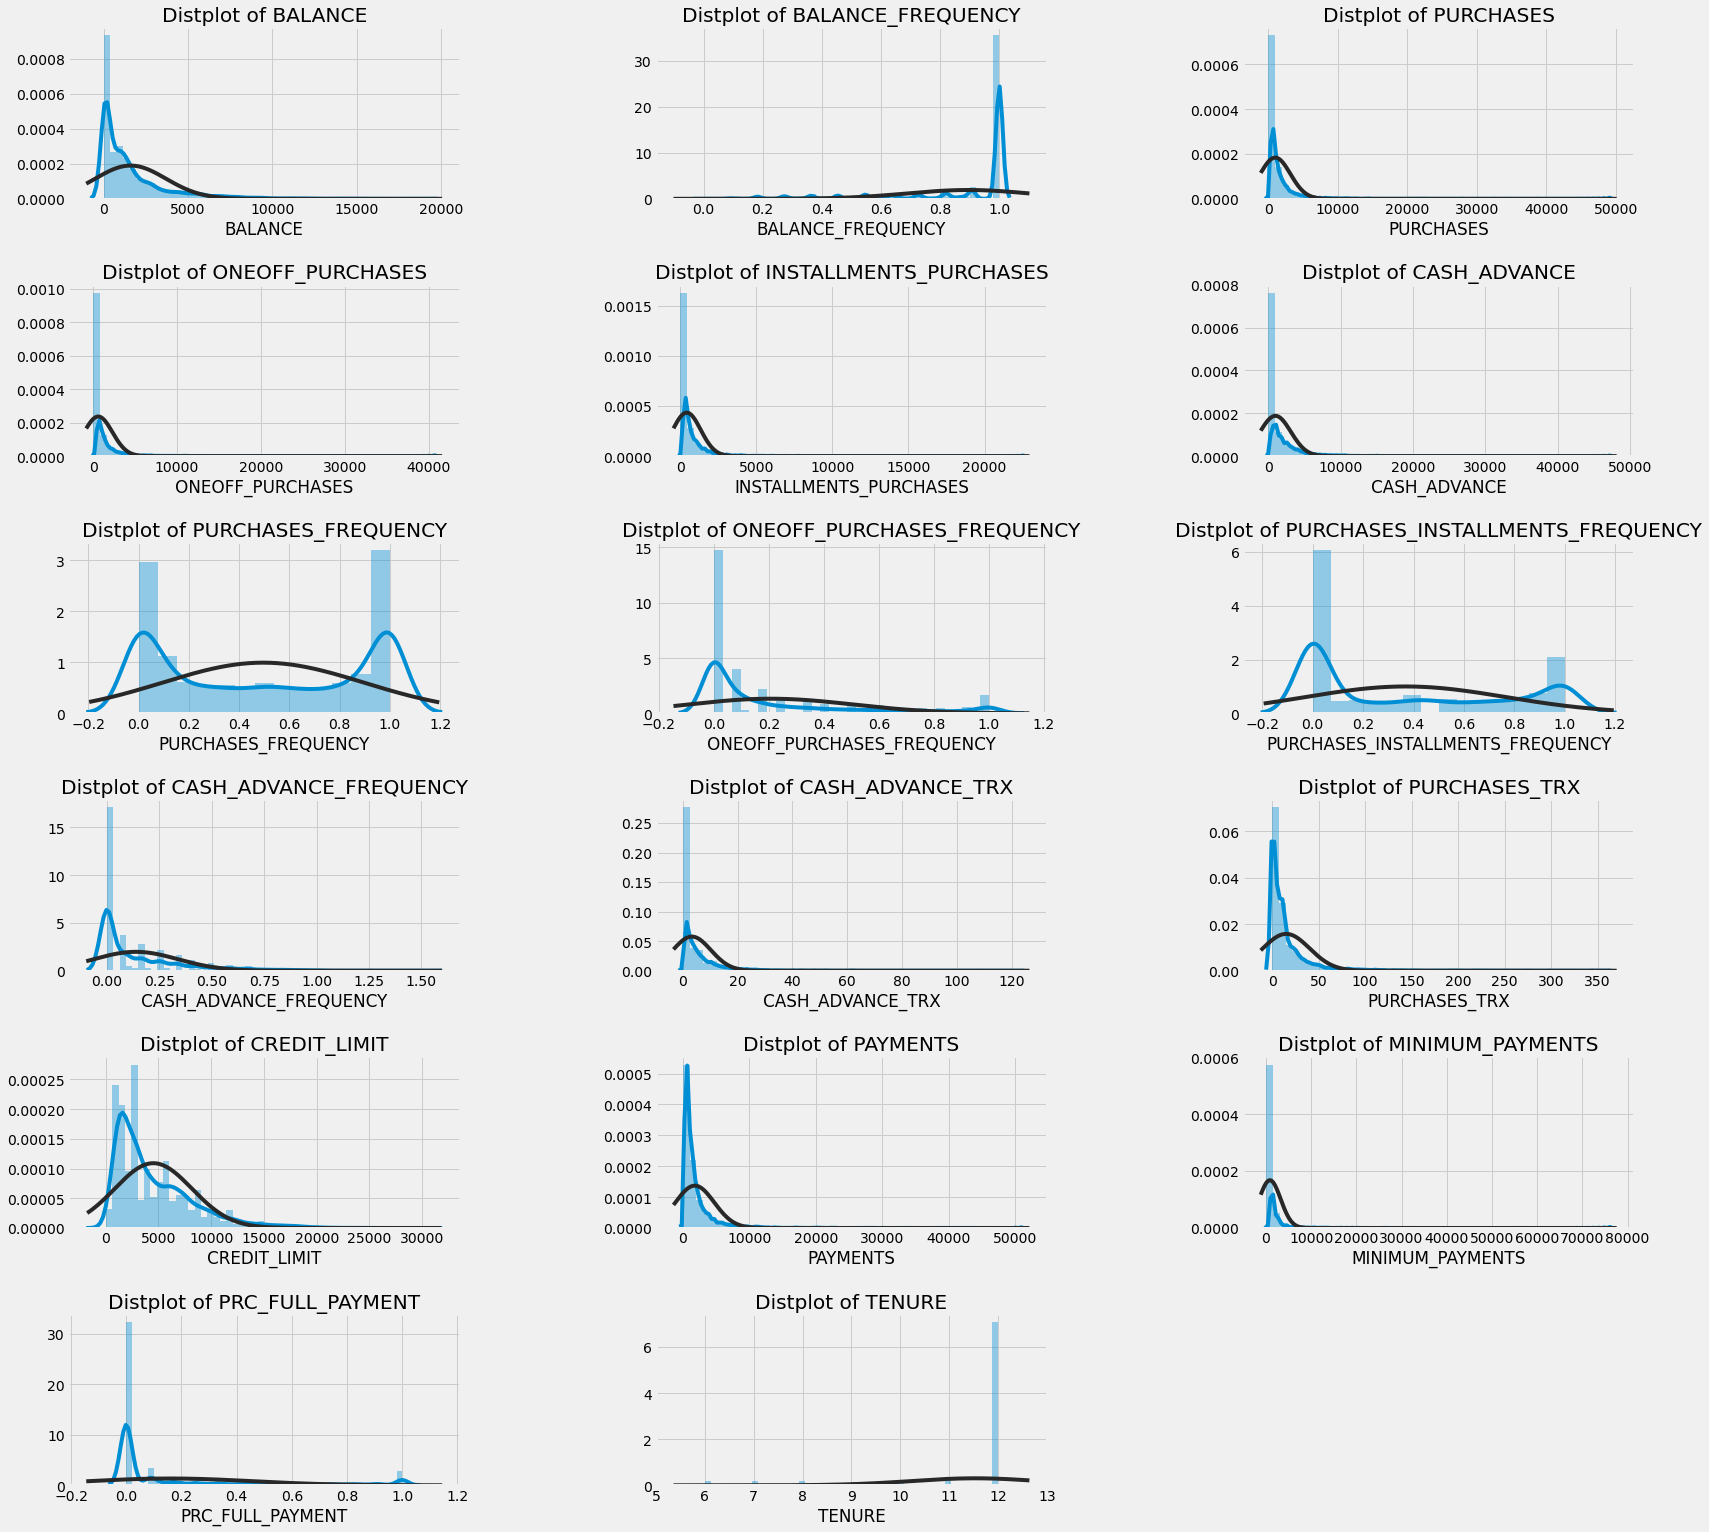

In [11]:
plt.figure(1 , figsize = (25 , 25))
n = 0 
for x in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']:
    n += 1
    plt.subplot(6 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(X[x], fit = norm)
    plt.title('Distplot of {}'.format(x))
plt.show()

<AxesSubplot:title={'center':'Tenure'}, ylabel='Density'>

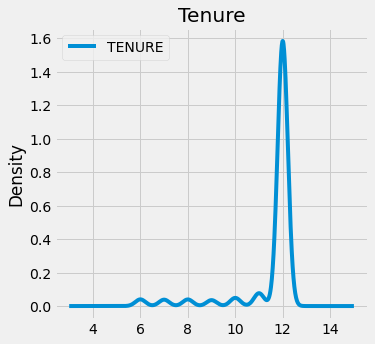

In [12]:
X[['TENURE']].plot.kde(figsize=(5,5),title='Tenure')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix')

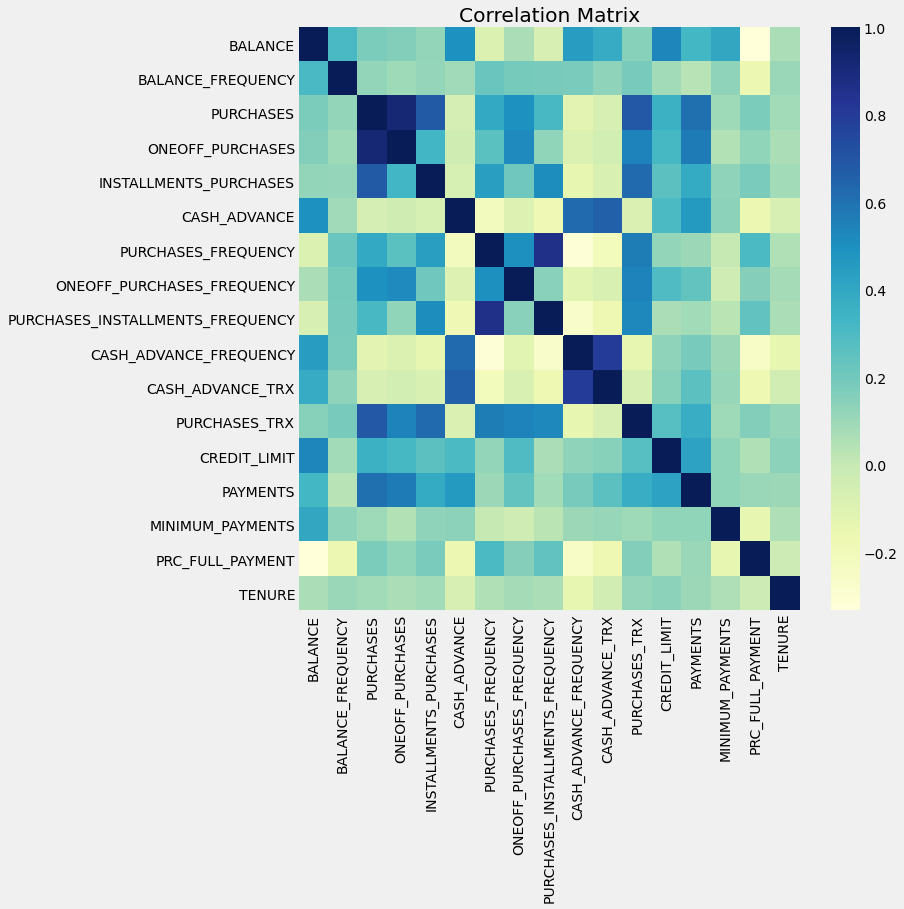

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(X.corr(), cmap="YlGnBu")

plt.title('Correlation Matrix')

According to the correlation matrix, balance has a high correlation with credit limit, and cash advance. Purchases variable has a strong positive relation with payments, installments purchases, one off purchases.

In [14]:
# Standardize the dataset (aka: subtract the mean from each attribute)
ss = StandardScaler(with_std=False)
sdf = ss.fit_transform(X)

In [15]:
sdf.shape

(8637, 17)

# 2. Cluster Tendency

## 2.1 Hopkins Statistic

In [16]:
from pyclustertend import hopkins
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n) 
    hopkins_stats.append(hopkins(sdf,p))
print(hopkins_stats)

[0.01876552592537581, 0.01753363990805747, 0.017698047321157307, 0.016589775992411813, 0.017811006058327257]


Hopkins statistics around 0.5 express no clusterability and a score tending to 0 or 1 express a high cluster tendency.

## 2.2 T-sne Plot

<AxesSubplot:xlabel='x', ylabel='y'>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

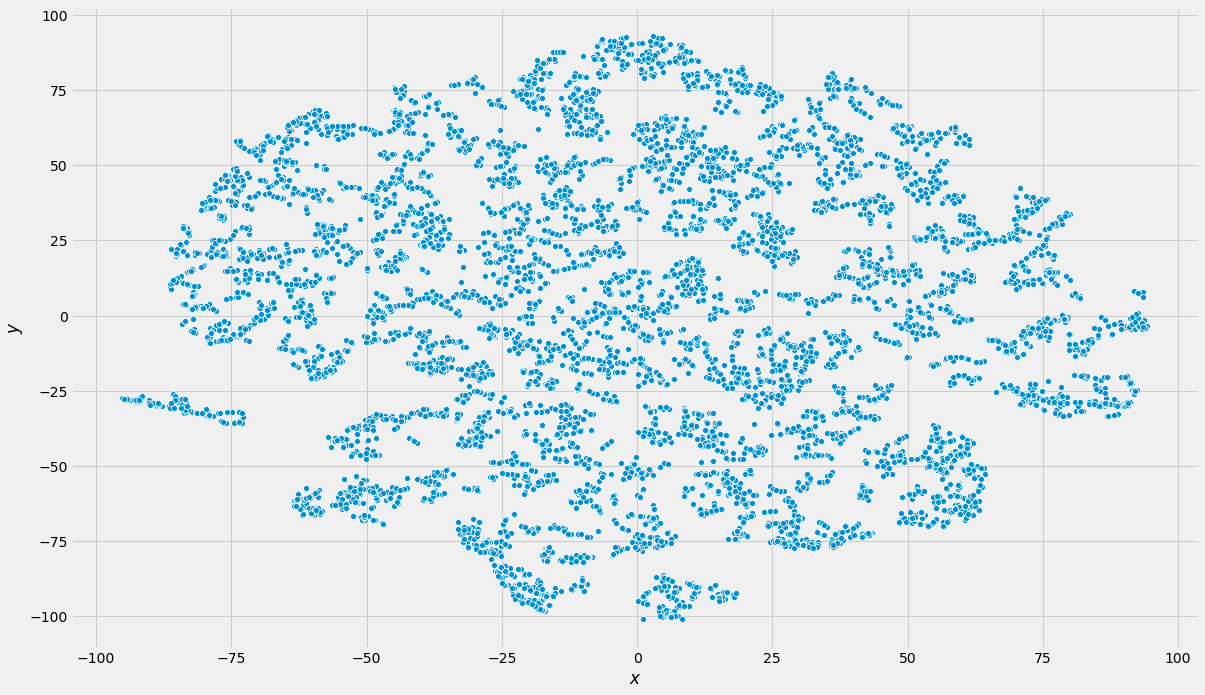

In [17]:
tsne = TSNE(n_components =2, perplexity = 20, random_state = 1000)
data_tsne = tsne.fit_transform(sdf)

df_tsne = pd.DataFrame(data_tsne, columns = ['x', 'y'], index = X.index)
dff = pd.concat([X,df_tsne], axis = 1)

fig, ax = plt.subplots(figsize = (18,11))

with sns.plotting_context("notebook", font_scale = 1.5):
    sns.scatterplot(x = "x",
                   y = "y",
                   sizes = (30,400),
                   data = dff,
                   ax = ax)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

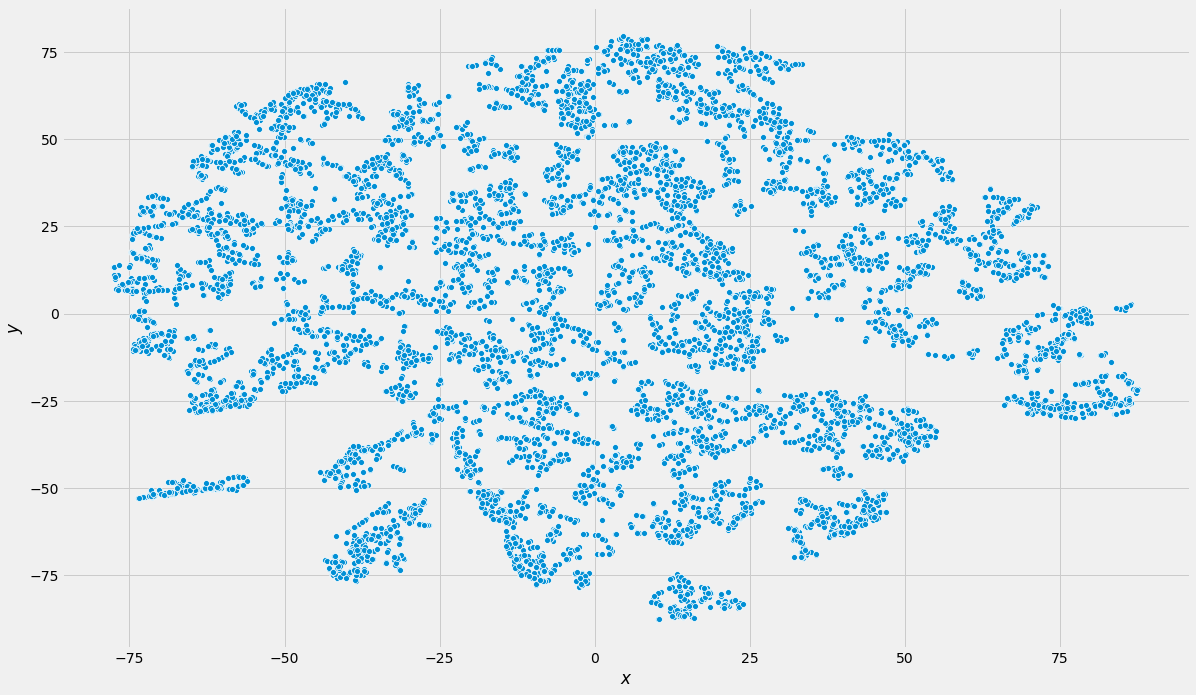

In [18]:
tsne = TSNE(n_components =2, perplexity = 30, random_state = 1000)
data_tsne = tsne.fit_transform(sdf)

df_tsne = pd.DataFrame(data_tsne, columns = ['x', 'y'], index = X.index)
dff = pd.concat([X,df_tsne], axis = 1)

fig, ax = plt.subplots(figsize = (18,11))

with sns.plotting_context("notebook", font_scale = 1.5):
    sns.scatterplot(x = "x",
                   y = "y",
                   sizes = (30,400),
                   data = dff,
                   ax = ax)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

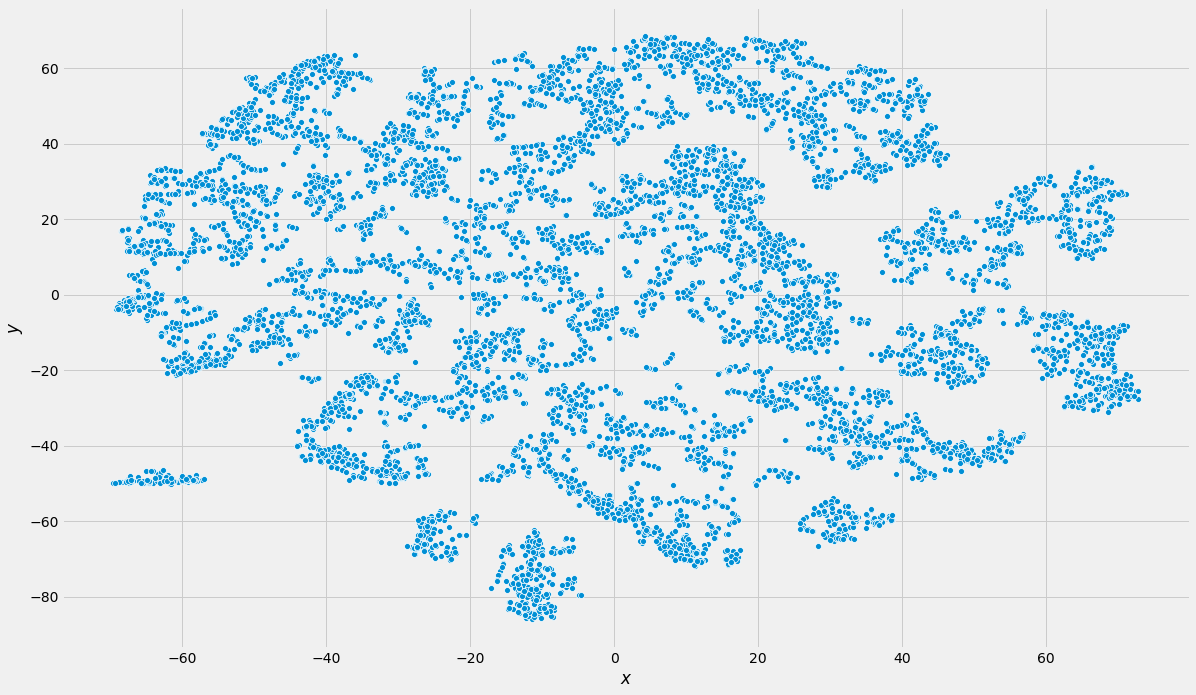

In [19]:
tsne = TSNE(n_components =2, perplexity = 40, random_state = 1000)
data_tsne = tsne.fit_transform(sdf)

df_tsne = pd.DataFrame(data_tsne, columns = ['x', 'y'], index = X.index)
dff = pd.concat([X,df_tsne], axis = 1)

fig, ax = plt.subplots(figsize = (18,11))

with sns.plotting_context("notebook", font_scale = 1.5):
    sns.scatterplot(x = "x",
                   y = "y",
                   sizes = (30,400),
                   data = dff,
                   ax = ax)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

By applying t-sne which are dimension reduction method, we can see the high dimensional data into 2-d plot. According to the right above plot, it seems like there are some clustering structure when I used perplexity 40, however, it is hard to determine the number of clusters and what the size will be. Also, each cluster have the varied shape, each size of clusters contains different number of points.

Therefore, using hopkins statistics and t-sne plot, we can cluster credit card dataset.

# 3. Clustering

## 3.1 K-means

### Determining number of k

<Figure size 2520x1440 with 0 Axes>

Text(0.5, 0, 'Number of Clusters Requested in K-means')

Text(0, 0.5, 'Average Inertia of the K-Means Results (3 trials)')

Text(0.5, 1.0, 'Elbow Method Results for Data')

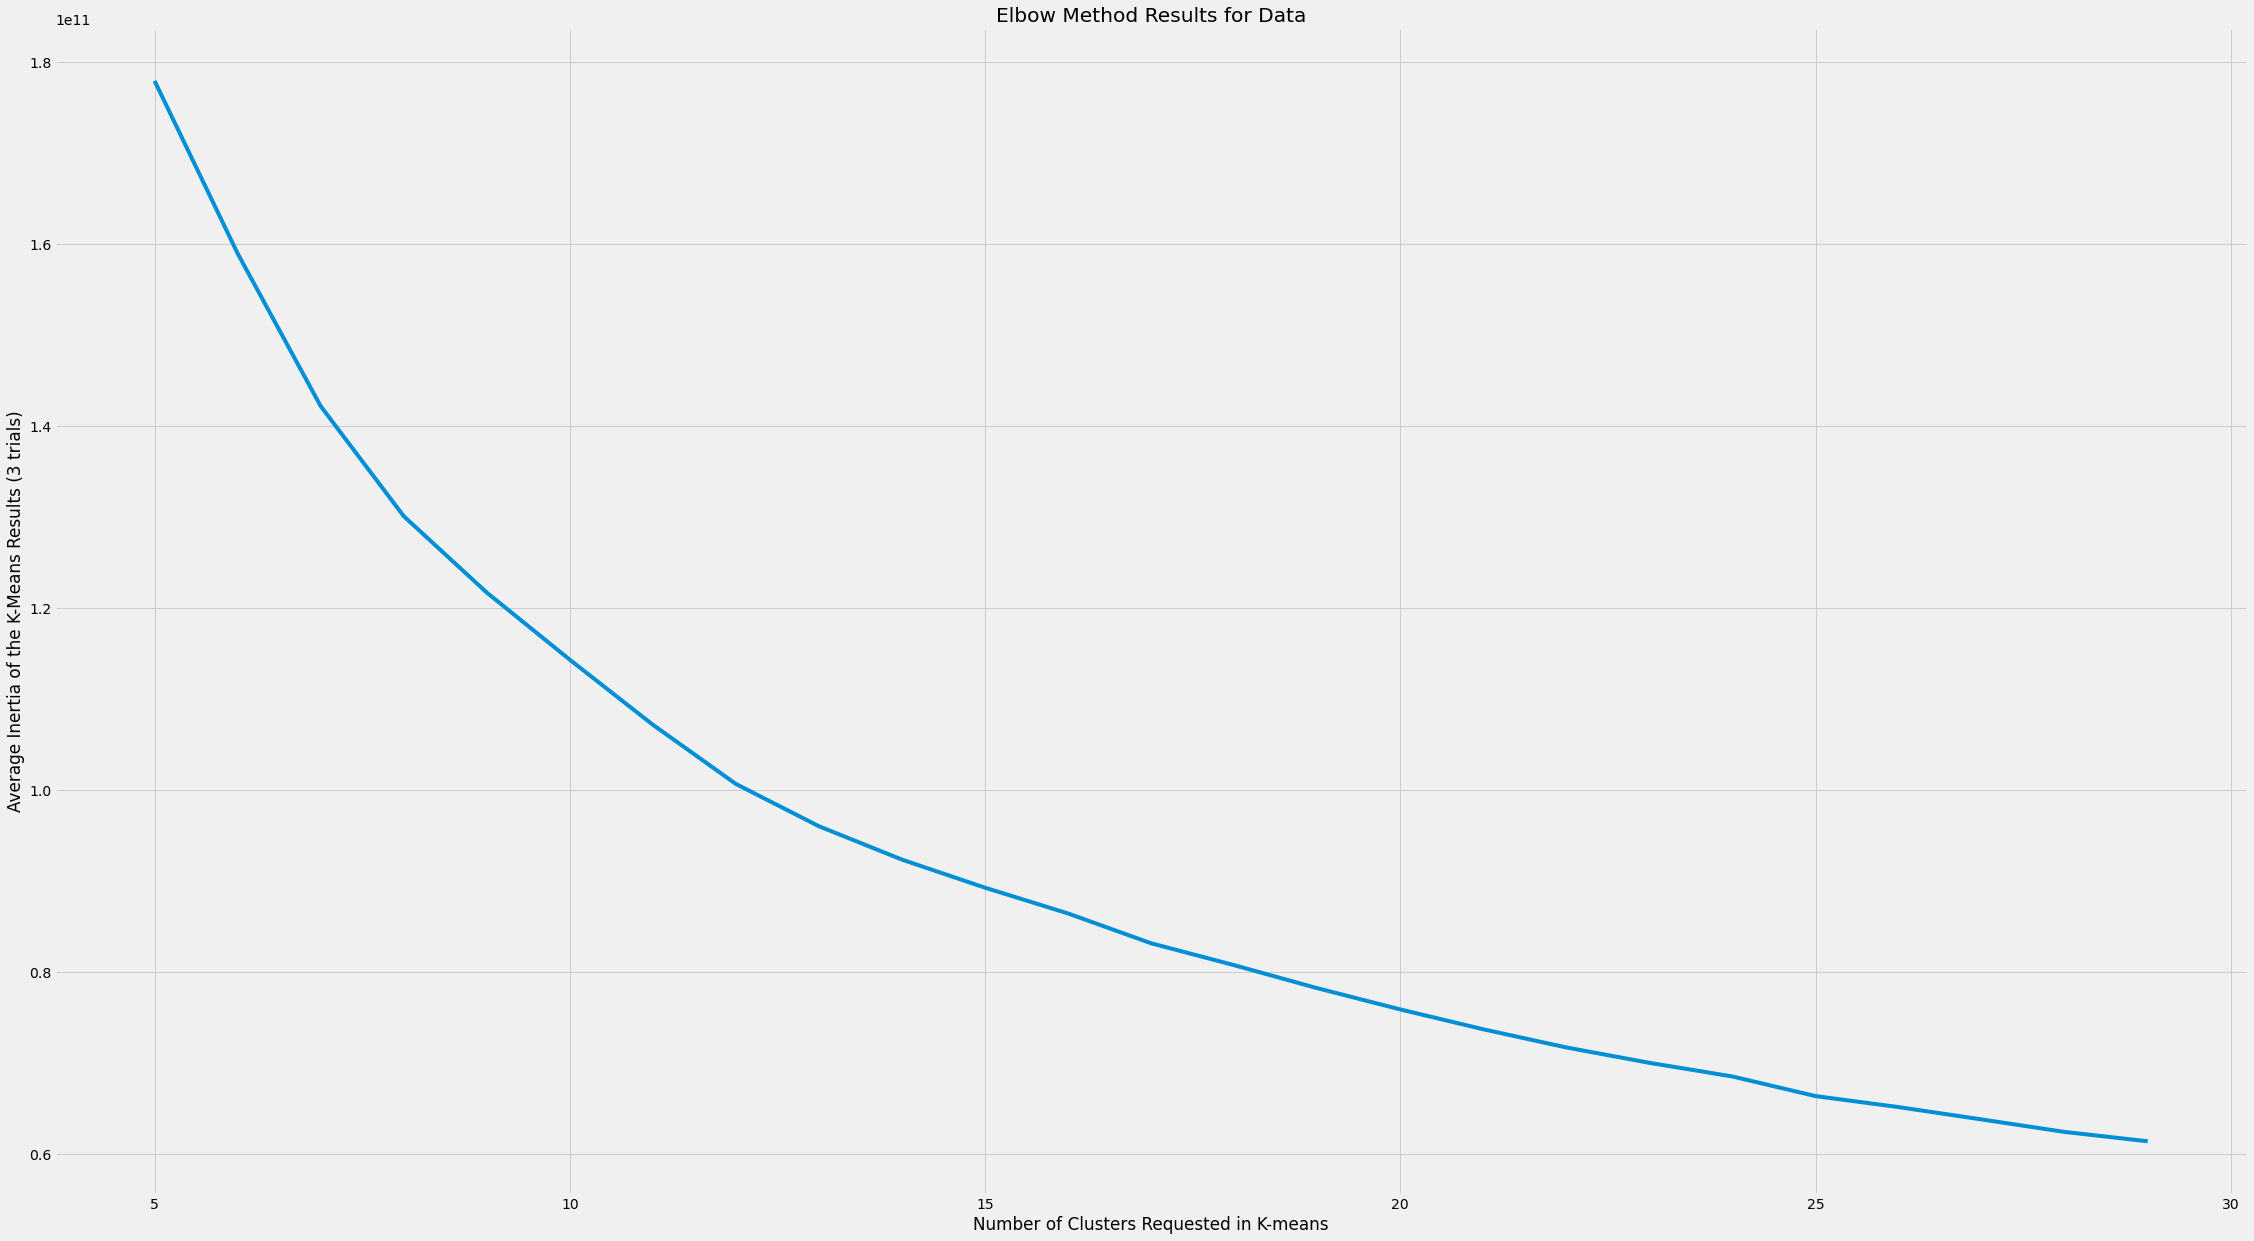

In [20]:
plt.figure(figsize=(35,20))
cluster_num_list = range(5,30)
avg_inertia_list = []

for k in cluster_num_list:
    sub_inertia_list = []
    for i in range(0,3):
        kmeans = KMeans(n_clusters = k).fit(sdf)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))
    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data')
plt.show()   

When the number of cluster exceeds 25, the curve starts leveling off.

### Silhoulette Plots to determine k

(-0.1, 1.0)

(0.0, 8697.0)

For n_clusters = 5 The average silhouette_score is : 0.3924018884572437


Text(-0.05, 346.5, '0')

Text(-0.05, 3386.5, '1')

Text(-0.05, 7347.0, '2')

Text(-0.05, 8626.5, '3')

Text(-0.05, 8668.0, '4')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8707.0)

For n_clusters = 6 The average silhouette_score is : 0.3949889537705811


Text(-0.05, 208.5, '0')

Text(-0.05, 3097.5, '1')

Text(-0.05, 6052.5, '2')

Text(-0.05, 7461.5, '3')

Text(-0.05, 8618.5, '4')

Text(-0.05, 8669.0, '5')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8717.0)

For n_clusters = 7 The average silhouette_score is : 0.3676284012271196


Text(-0.05, 86.5, '0')

Text(-0.05, 1342.0, '1')

Text(-0.05, 2533.0, '2')

Text(-0.05, 2732.0, '3')

Text(-0.05, 5423.0, '4')

Text(-0.05, 8298.0, '5')

Text(-0.05, 8688.0, '6')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8727.0)

For n_clusters = 8 The average silhouette_score is : 0.3829956609458359


Text(-0.05, 519.0, '0')

Text(-0.05, 1865.0, '1')

Text(-0.05, 2759.0, '2')

Text(-0.05, 5339.0, '3')

Text(-0.05, 7880.5, '4')

Text(-0.05, 7920.5, '5')

Text(-0.05, 8106.0, '6')

Text(-0.05, 8498.5, '7')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8737.0)

For n_clusters = 9 The average silhouette_score is : 0.3513240623018321


Text(-0.05, 823.0, '0')

Text(-0.05, 1888.5, '1')

Text(-0.05, 2152.5, '2')

Text(-0.05, 2192.5, '3')

Text(-0.05, 2271.0, '4')

Text(-0.05, 2466.5, '5')

Text(-0.05, 4971.0, '6')

Text(-0.05, 7510.5, '7')

Text(-0.05, 8209.0, '8')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8747.0)

For n_clusters = 10 The average silhouette_score is : 0.36103478774522246


Text(-0.05, 147.0, '0')

Text(-0.05, 804.0, '1')

Text(-0.05, 3674.0, '2')

Text(-0.05, 6203.0, '3')

Text(-0.05, 6391.5, '4')

Text(-0.05, 6456.0, '5')

Text(-0.05, 7318.5, '6')

Text(-0.05, 8147.5, '7')

Text(-0.05, 8212.0, '8')

Text(-0.05, 8501.0, '9')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8757.0)

For n_clusters = 11 The average silhouette_score is : 0.3577786129173101


Text(-0.05, 707.5, '0')

Text(-0.05, 1576.0, '1')

Text(-0.05, 4105.0, '2')

Text(-0.05, 6483.0, '3')

Text(-0.05, 6550.5, '4')

Text(-0.05, 6663.5, '5')

Text(-0.05, 6765.0, '6')

Text(-0.05, 7305.5, '7')

Text(-0.05, 8029.0, '8')

Text(-0.05, 8261.5, '9')

Text(-0.05, 8511.0, '10')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8767.0)

For n_clusters = 12 The average silhouette_score is : 0.36186907938756646


Text(-0.05, 2358.5, '0')

Text(-0.05, 5182.0, '1')

Text(-0.05, 5716.5, '2')

Text(-0.05, 5933.0, '3')

Text(-0.05, 6733.5, '4')

Text(-0.05, 7509.5, '5')

Text(-0.05, 7858.5, '6')

Text(-0.05, 8088.5, '7')

Text(-0.05, 8112.0, '8')

Text(-0.05, 8161.0, '9')

Text(-0.05, 8437.5, '10')

Text(-0.05, 8721.0, '11')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8777.0)

For n_clusters = 13 The average silhouette_score is : 0.2887366216689545


Text(-0.05, 38.5, '0')

Text(-0.05, 1864.5, '1')

Text(-0.05, 3861.0, '2')

Text(-0.05, 4079.0, '3')

Text(-0.05, 4230.5, '4')

Text(-0.05, 4383.0, '5')

Text(-0.05, 4525.0, '6')

Text(-0.05, 5286.5, '7')

Text(-0.05, 6104.5, '8')

Text(-0.05, 6655.0, '9')

Text(-0.05, 7069.5, '10')

Text(-0.05, 7169.5, '11')

Text(-0.05, 7997.0, '12')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8787.0)

For n_clusters = 14 The average silhouette_score is : 0.2528973227500641


Text(-0.05, 1599.5, '0')

Text(-0.05, 3302.5, '1')

Text(-0.05, 3620.0, '2')

Text(-0.05, 3844.0, '3')

Text(-0.05, 4401.0, '4')

Text(-0.05, 4951.5, '5')

Text(-0.05, 5057.5, '6')

Text(-0.05, 5196.0, '7')

Text(-0.05, 5779.5, '8')

Text(-0.05, 6344.0, '9')

Text(-0.05, 6511.0, '10')

Text(-0.05, 6948.0, '11')

Text(-0.05, 7290.5, '12')

Text(-0.05, 8061.5, '13')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8797.0)

For n_clusters = 15 The average silhouette_score is : 0.2833572891340332


Text(-0.05, 550.5, '0')

Text(-0.05, 1388.0, '1')

Text(-0.05, 1731.0, '2')

Text(-0.05, 1973.5, '3')

Text(-0.05, 2205.0, '4')

Text(-0.05, 2674.5, '5')

Text(-0.05, 3168.5, '6')

Text(-0.05, 3338.5, '7')

Text(-0.05, 5188.5, '8')

Text(-0.05, 6948.0, '9')

Text(-0.05, 7094.5, '10')

Text(-0.05, 7234.5, '11')

Text(-0.05, 7394.0, '12')

Text(-0.05, 7561.5, '13')

Text(-0.05, 8185.0, '14')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8807.0)

For n_clusters = 16 The average silhouette_score is : 0.2974322940349439


Text(-0.05, 1809.0, '0')

Text(-0.05, 4219.5, '1')

Text(-0.05, 5152.5, '2')

Text(-0.05, 5524.0, '3')

Text(-0.05, 5582.5, '4')

Text(-0.05, 5646.5, '5')

Text(-0.05, 5855.0, '6')

Text(-0.05, 6028.0, '7')

Text(-0.05, 6209.5, '8')

Text(-0.05, 6392.5, '9')

Text(-0.05, 6453.5, '10')

Text(-0.05, 6639.0, '11')

Text(-0.05, 7330.0, '12')

Text(-0.05, 7888.0, '13')

Text(-0.05, 8215.0, '14')

Text(-0.05, 8668.0, '15')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8817.0)

For n_clusters = 17 The average silhouette_score is : 0.2848677162678127


Text(-0.05, 1701.5, '0')

Text(-0.05, 3434.5, '1')

Text(-0.05, 3585.0, '2')

Text(-0.05, 3833.0, '3')

Text(-0.05, 4285.5, '4')

Text(-0.05, 4612.5, '5')

Text(-0.05, 4635.5, '6')

Text(-0.05, 4690.0, '7')

Text(-0.05, 4836.5, '8')

Text(-0.05, 5309.0, '9')

Text(-0.05, 5932.0, '10')

Text(-0.05, 6718.0, '11')

Text(-0.05, 7258.5, '12')

Text(-0.05, 7785.0, '13')

Text(-0.05, 8342.5, '14')

Text(-0.05, 8474.5, '15')

Text(-0.05, 8688.0, '16')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8827.0)

For n_clusters = 18 The average silhouette_score is : 0.27310502519895413


Text(-0.05, 54.0, '0')

Text(-0.05, 1705.0, '1')

Text(-0.05, 3495.0, '2')

Text(-0.05, 3765.0, '3')

Text(-0.05, 3960.5, '4')

Text(-0.05, 4212.5, '5')

Text(-0.05, 4366.0, '6')

Text(-0.05, 4425.0, '7')

Text(-0.05, 4766.0, '8')

Text(-0.05, 5071.0, '9')

Text(-0.05, 5090.0, '10')

Text(-0.05, 5602.5, '11')

Text(-0.05, 6157.0, '12')

Text(-0.05, 6846.0, '13')

Text(-0.05, 7615.0, '14')

Text(-0.05, 7764.5, '15')

Text(-0.05, 8281.0, '16')

Text(-0.05, 8801.5, '17')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8837.0)

For n_clusters = 19 The average silhouette_score is : 0.290104032647885


Text(-0.05, 522.0, '0')

Text(-0.05, 1090.0, '1')

Text(-0.05, 1156.0, '2')

Text(-0.05, 2865.5, '3')

Text(-0.05, 4856.5, '4')

Text(-0.05, 5169.0, '5')

Text(-0.05, 5542.0, '6')

Text(-0.05, 5942.5, '7')

Text(-0.05, 6005.5, '8')

Text(-0.05, 6139.0, '9')

Text(-0.05, 6529.0, '10')

Text(-0.05, 6906.0, '11')

Text(-0.05, 7140.5, '12')

Text(-0.05, 7286.0, '13')

Text(-0.05, 7438.5, '14')

Text(-0.05, 7587.0, '15')

Text(-0.05, 7680.5, '16')

Text(-0.05, 7810.0, '17')

Text(-0.05, 8343.0, '18')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8847.0)

For n_clusters = 20 The average silhouette_score is : 0.267344485253897


Text(-0.05, 317.5, '0')

Text(-0.05, 2185.5, '1')

Text(-0.05, 3748.5, '2')

Text(-0.05, 4002.5, '3')

Text(-0.05, 4713.0, '4')

Text(-0.05, 5189.5, '5')

Text(-0.05, 5268.5, '6')

Text(-0.05, 5353.5, '7')

Text(-0.05, 5491.5, '8')

Text(-0.05, 5658.0, '9')

Text(-0.05, 6232.5, '10')

Text(-0.05, 6778.0, '11')

Text(-0.05, 6868.0, '12')

Text(-0.05, 6960.5, '13')

Text(-0.05, 6989.5, '14')

Text(-0.05, 7044.0, '15')

Text(-0.05, 7226.0, '16')

Text(-0.05, 7960.5, '17')

Text(-0.05, 8687.0, '18')

Text(-0.05, 8828.5, '19')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8857.0)

For n_clusters = 21 The average silhouette_score is : 0.24263419898388672


Text(-0.05, 74.0, '0')

Text(-0.05, 627.5, '1')

Text(-0.05, 1397.5, '2')

Text(-0.05, 1691.0, '3')

Text(-0.05, 1745.0, '4')

Text(-0.05, 1799.0, '5')

Text(-0.05, 2417.5, '6')

Text(-0.05, 3040.5, '7')

Text(-0.05, 3183.0, '8')

Text(-0.05, 3524.0, '9')

Text(-0.05, 4186.0, '10')

Text(-0.05, 4722.0, '11')

Text(-0.05, 4948.5, '12')

Text(-0.05, 5134.0, '13')

Text(-0.05, 5197.0, '14')

Text(-0.05, 5264.5, '15')

Text(-0.05, 5567.5, '16')

Text(-0.05, 5835.5, '17')

Text(-0.05, 5960.5, '18')

Text(-0.05, 6088.5, '19')

Text(-0.05, 7478.5, '20')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8867.0)

For n_clusters = 22 The average silhouette_score is : 0.28657392416749095


Text(-0.05, 1627.0, '0')

Text(-0.05, 3359.0, '1')

Text(-0.05, 3543.0, '2')

Text(-0.05, 4123.5, '3')

Text(-0.05, 4637.5, '4')

Text(-0.05, 4688.0, '5')

Text(-0.05, 4747.0, '6')

Text(-0.05, 5045.5, '7')

Text(-0.05, 5421.5, '8')

Text(-0.05, 5529.0, '9')

Text(-0.05, 5592.0, '10')

Text(-0.05, 6073.5, '11')

Text(-0.05, 6652.0, '12')

Text(-0.05, 6816.0, '13')

Text(-0.05, 7005.0, '14')

Text(-0.05, 7184.0, '15')

Text(-0.05, 7212.5, '16')

Text(-0.05, 7277.0, '17')

Text(-0.05, 7662.0, '18')

Text(-0.05, 8102.5, '19')

Text(-0.05, 8213.5, '20')

Text(-0.05, 8543.5, '21')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8877.0)

For n_clusters = 23 The average silhouette_score is : 0.24715032399821446


Text(-0.05, 1325.0, '0')

Text(-0.05, 3117.0, '1')

Text(-0.05, 3696.5, '2')

Text(-0.05, 3818.5, '3')

Text(-0.05, 3883.0, '4')

Text(-0.05, 3949.5, '5')

Text(-0.05, 4040.0, '6')

Text(-0.05, 4337.0, '7')

Text(-0.05, 5030.0, '8')

Text(-0.05, 5565.0, '9')

Text(-0.05, 5683.0, '10')

Text(-0.05, 5748.0, '11')

Text(-0.05, 5777.5, '12')

Text(-0.05, 6435.5, '13')

Text(-0.05, 7217.0, '14')

Text(-0.05, 7405.5, '15')

Text(-0.05, 7655.5, '16')

Text(-0.05, 7938.0, '17')

Text(-0.05, 8037.0, '18')

Text(-0.05, 8063.0, '19')

Text(-0.05, 8206.0, '20')

Text(-0.05, 8385.5, '21')

Text(-0.05, 8650.5, '22')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8887.0)

For n_clusters = 24 The average silhouette_score is : 0.2517311959470704


Text(-0.05, 1324.0, '0')

Text(-0.05, 2789.5, '1')

Text(-0.05, 2944.5, '2')

Text(-0.05, 3393.5, '3')

Text(-0.05, 3948.5, '4')

Text(-0.05, 4127.5, '5')

Text(-0.05, 4205.0, '6')

Text(-0.05, 4287.0, '7')

Text(-0.05, 4425.0, '8')

Text(-0.05, 4771.0, '9')

Text(-0.05, 5618.0, '10')

Text(-0.05, 6387.0, '11')

Text(-0.05, 7008.0, '12')

Text(-0.05, 7476.5, '13')

Text(-0.05, 7540.5, '14')

Text(-0.05, 7703.5, '15')

Text(-0.05, 7861.5, '16')

Text(-0.05, 7946.5, '17')

Text(-0.05, 8063.5, '18')

Text(-0.05, 8156.5, '19')

Text(-0.05, 8212.0, '20')

Text(-0.05, 8231.0, '21')

Text(-0.05, 8257.5, '22')

Text(-0.05, 8577.0, '23')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8897.0)

For n_clusters = 25 The average silhouette_score is : 0.2536804560600629


Text(-0.05, 421.0, '0')

Text(-0.05, 925.0, '1')

Text(-0.05, 1020.5, '2')

Text(-0.05, 1243.0, '3')

Text(-0.05, 1474.5, '4')

Text(-0.05, 1643.5, '5')

Text(-0.05, 1858.5, '6')

Text(-0.05, 1941.0, '7')

Text(-0.05, 1998.0, '8')

Text(-0.05, 3355.0, '9')

Text(-0.05, 4722.0, '10')

Text(-0.05, 4812.5, '11')

Text(-0.05, 4864.0, '12')

Text(-0.05, 4971.5, '13')

Text(-0.05, 5149.0, '14')

Text(-0.05, 5393.5, '15')

Text(-0.05, 5570.5, '16')

Text(-0.05, 6164.0, '17')

Text(-0.05, 6875.5, '18')

Text(-0.05, 7414.5, '19')

Text(-0.05, 7871.5, '20')

Text(-0.05, 7977.5, '21')

Text(-0.05, 8214.0, '22')

Text(-0.05, 8403.5, '23')

Text(-0.05, 8654.0, '24')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8907.0)

For n_clusters = 26 The average silhouette_score is : 0.20481493883512655


Text(-0.05, 519.0, '0')

Text(-0.05, 1165.0, '1')

Text(-0.05, 1315.5, '2')

Text(-0.05, 1382.5, '3')

Text(-0.05, 1553.0, '4')

Text(-0.05, 1723.0, '5')

Text(-0.05, 1779.5, '6')

Text(-0.05, 1802.0, '7')

Text(-0.05, 1828.0, '8')

Text(-0.05, 2059.5, '9')

Text(-0.05, 2645.0, '10')

Text(-0.05, 3158.5, '11')

Text(-0.05, 3313.5, '12')

Text(-0.05, 3339.5, '13')

Text(-0.05, 4514.5, '14')

Text(-0.05, 5746.0, '15')

Text(-0.05, 6299.5, '16')

Text(-0.05, 7154.0, '17')

Text(-0.05, 7728.0, '18')

Text(-0.05, 8004.0, '19')

Text(-0.05, 8137.0, '20')

Text(-0.05, 8237.5, '21')

Text(-0.05, 8418.5, '22')

Text(-0.05, 8668.5, '23')

Text(-0.05, 8800.5, '24')

Text(-0.05, 8860.0, '25')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8917.0)

For n_clusters = 27 The average silhouette_score is : 0.22219330422187386


Text(-0.05, 597.5, '0')

Text(-0.05, 1249.0, '1')

Text(-0.05, 1384.0, '2')

Text(-0.05, 1478.5, '3')

Text(-0.05, 1542.5, '4')

Text(-0.05, 1595.0, '5')

Text(-0.05, 1791.5, '6')

Text(-0.05, 2528.5, '7')

Text(-0.05, 3084.0, '8')

Text(-0.05, 3136.5, '9')

Text(-0.05, 3193.5, '10')

Text(-0.05, 3434.0, '11')

Text(-0.05, 3793.5, '12')

Text(-0.05, 4066.0, '13')

Text(-0.05, 4272.0, '14')

Text(-0.05, 4665.0, '15')

Text(-0.05, 5189.0, '16')

Text(-0.05, 5399.0, '17')

Text(-0.05, 5528.0, '18')

Text(-0.05, 5654.5, '19')

Text(-0.05, 5711.0, '20')

Text(-0.05, 5798.5, '21')

Text(-0.05, 6258.0, '22')

Text(-0.05, 6691.5, '23')

Text(-0.05, 6844.0, '24')

Text(-0.05, 7034.5, '25')

Text(-0.05, 8000.5, '26')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8927.0)

For n_clusters = 28 The average silhouette_score is : 0.24919165704397744


Text(-0.05, 17.5, '0')

Text(-0.05, 295.0, '1')

Text(-0.05, 722.5, '2')

Text(-0.05, 928.0, '3')

Text(-0.05, 1122.5, '4')

Text(-0.05, 1288.0, '5')

Text(-0.05, 2516.5, '6')

Text(-0.05, 3739.0, '7')

Text(-0.05, 3763.0, '8')

Text(-0.05, 3842.0, '9')

Text(-0.05, 4021.5, '10')

Text(-0.05, 4174.0, '11')

Text(-0.05, 4228.0, '12')

Text(-0.05, 4648.0, '13')

Text(-0.05, 5108.5, '14')

Text(-0.05, 5591.5, '15')

Text(-0.05, 6059.0, '16')

Text(-0.05, 6109.5, '17')

Text(-0.05, 6155.5, '18')

Text(-0.05, 6361.0, '19')

Text(-0.05, 6717.5, '20')

Text(-0.05, 6921.5, '21')

Text(-0.05, 7000.5, '22')

Text(-0.05, 7259.5, '23')

Text(-0.05, 7514.5, '24')

Text(-0.05, 8109.0, '25')

Text(-0.05, 8700.5, '26')

Text(-0.05, 8840.0, '27')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8937.0)

For n_clusters = 29 The average silhouette_score is : 0.25389973778358244


Text(-0.05, 423.0, '0')

Text(-0.05, 900.5, '1')

Text(-0.05, 997.0, '2')

Text(-0.05, 1048.5, '3')

Text(-0.05, 1245.0, '4')

Text(-0.05, 1512.0, '5')

Text(-0.05, 1615.5, '6')

Text(-0.05, 1773.0, '7')

Text(-0.05, 1967.0, '8')

Text(-0.05, 2434.5, '9')

Text(-0.05, 3405.0, '10')

Text(-0.05, 3992.0, '11')

Text(-0.05, 4160.5, '12')

Text(-0.05, 4311.0, '13')

Text(-0.05, 4363.5, '14')

Text(-0.05, 5631.0, '15')

Text(-0.05, 6865.5, '16')

Text(-0.05, 6888.0, '17')

Text(-0.05, 6945.5, '18')

Text(-0.05, 7088.0, '19')

Text(-0.05, 7194.5, '20')

Text(-0.05, 7458.5, '21')

Text(-0.05, 7732.0, '22')

Text(-0.05, 7808.5, '23')

Text(-0.05, 7915.0, '24')

Text(-0.05, 8154.0, '25')

Text(-0.05, 8545.5, '26')

Text(-0.05, 8772.5, '27')

Text(-0.05, 8866.0, '28')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 8947.0)

For n_clusters = 30 The average silhouette_score is : 0.25925700064928214


Text(-0.05, 264.0, '0')

Text(-0.05, 915.5, '1')

Text(-0.05, 1322.5, '2')

Text(-0.05, 1499.5, '3')

Text(-0.05, 1846.0, '4')

Text(-0.05, 2041.0, '5')

Text(-0.05, 2063.5, '6')

Text(-0.05, 2082.5, '7')

Text(-0.05, 2132.0, '8')

Text(-0.05, 2340.0, '9')

Text(-0.05, 2595.0, '10')

Text(-0.05, 2764.0, '11')

Text(-0.05, 3229.0, '12')

Text(-0.05, 3719.5, '13')

Text(-0.05, 4380.0, '14')

Text(-0.05, 4997.0, '15')

Text(-0.05, 5088.0, '16')

Text(-0.05, 5128.0, '17')

Text(-0.05, 5151.5, '18')

Text(-0.05, 5184.0, '19')

Text(-0.05, 5243.0, '20')

Text(-0.05, 6541.5, '21')

Text(-0.05, 7808.0, '22')

Text(-0.05, 7953.5, '23')

Text(-0.05, 8291.0, '24')

Text(-0.05, 8496.5, '25')

Text(-0.05, 8565.0, '26')

Text(-0.05, 8664.5, '27')

Text(-0.05, 8767.5, '28')

Text(-0.05, 8887.5, '29')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

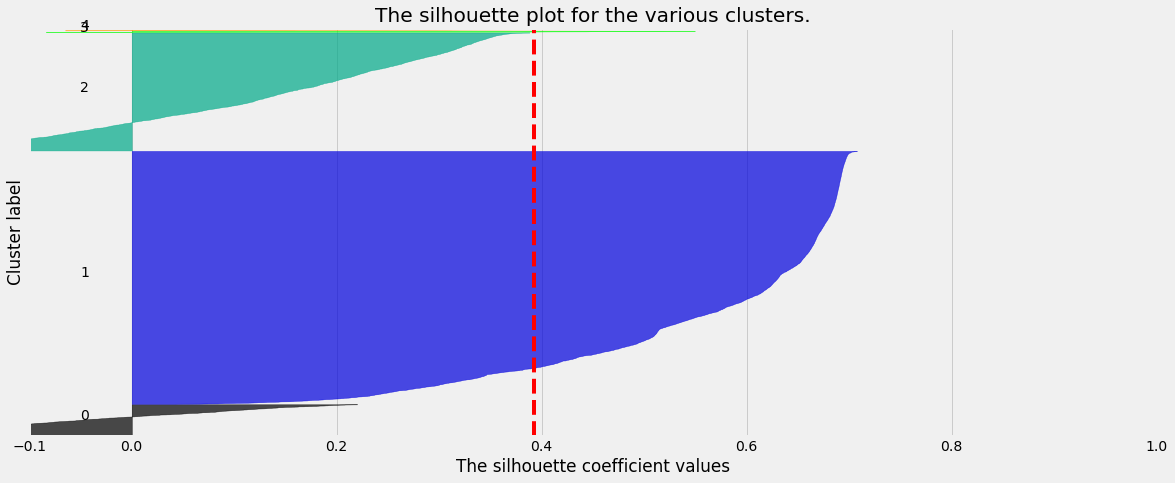

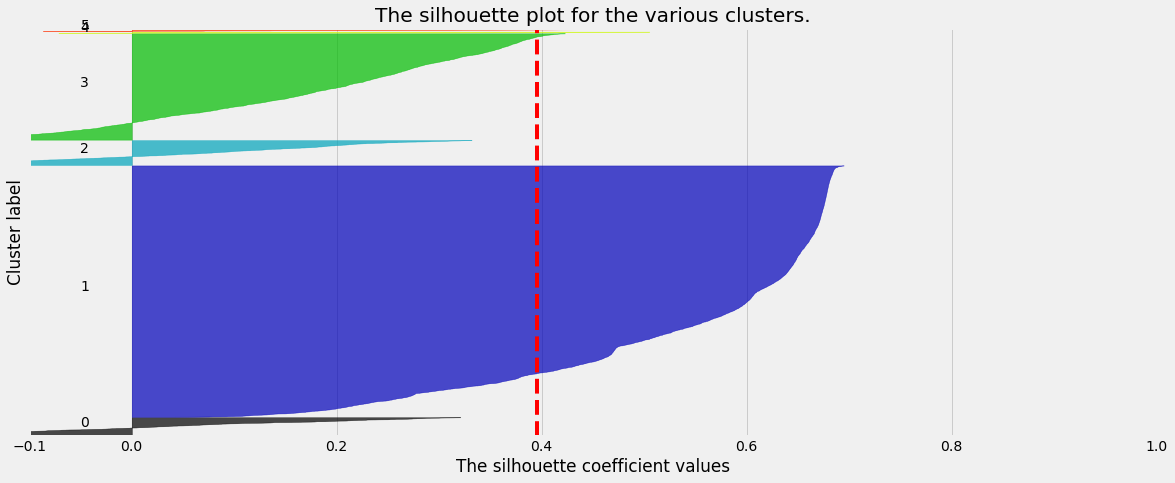

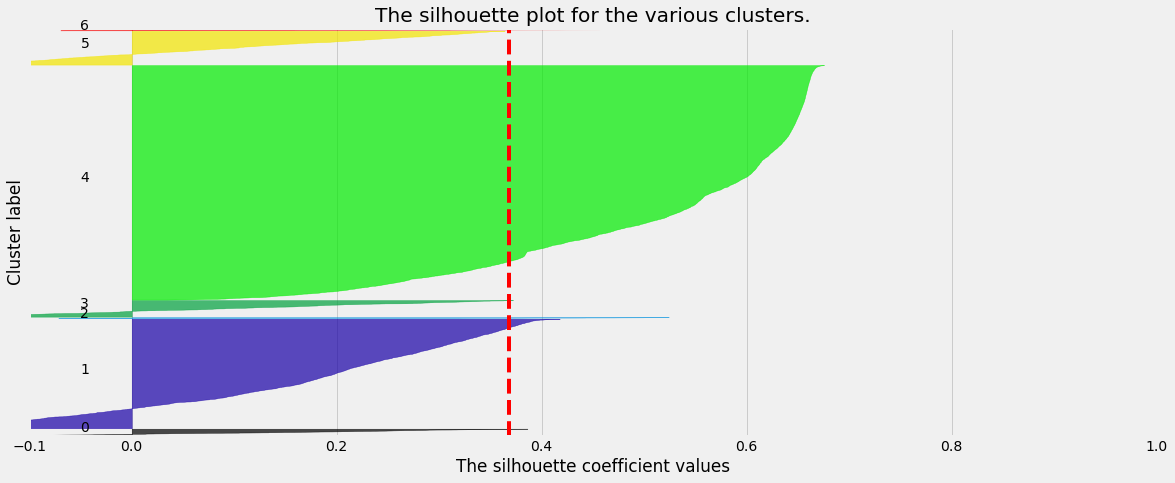

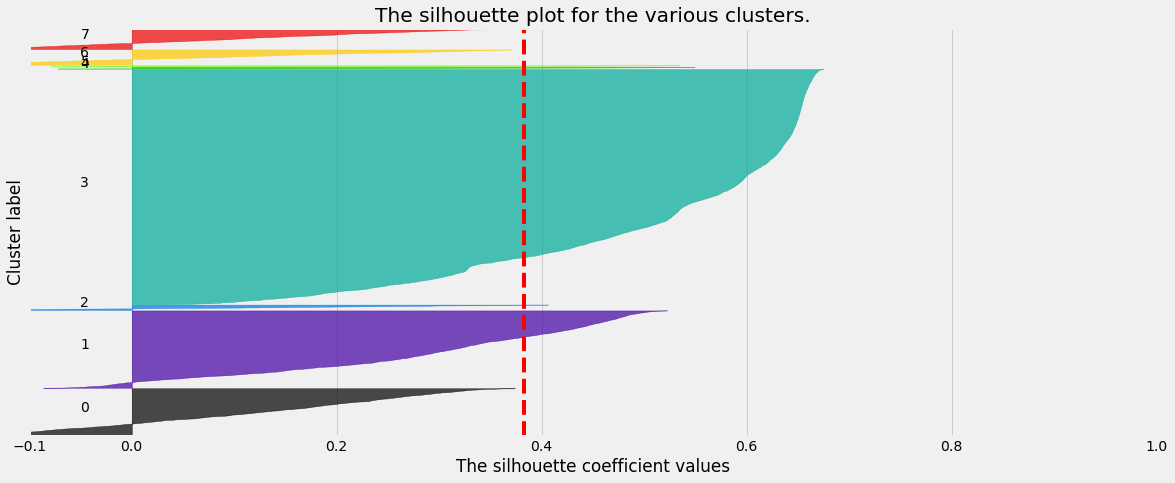

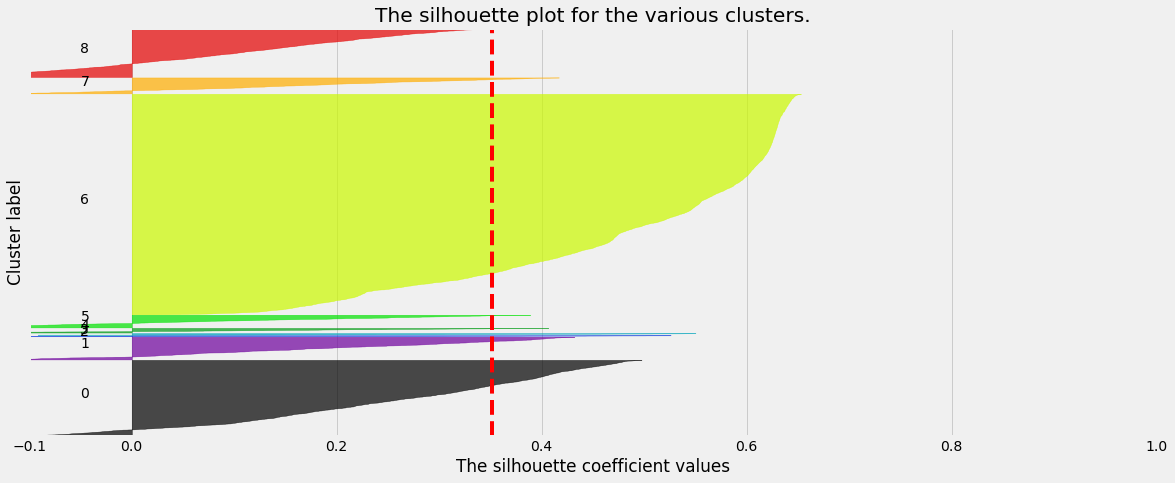

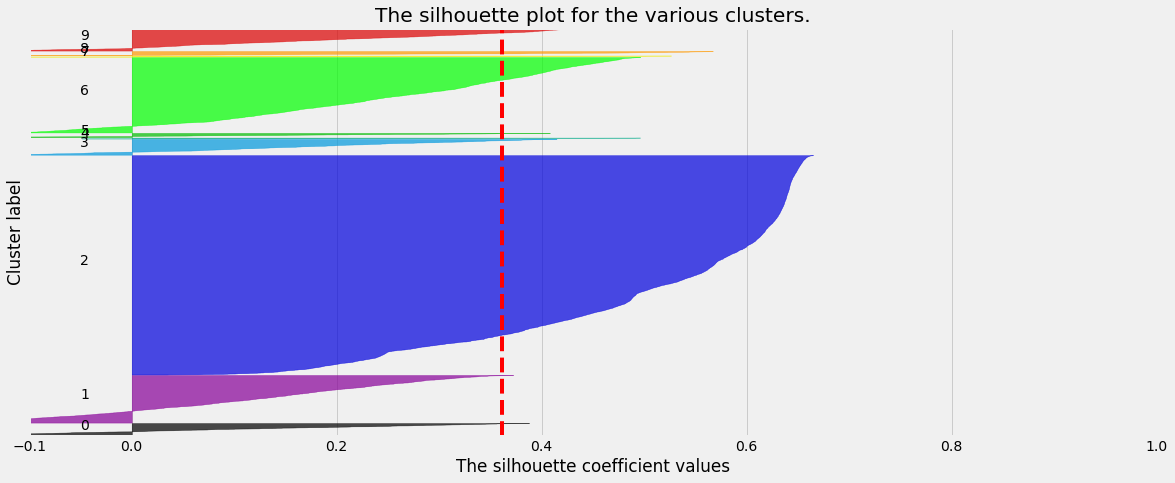

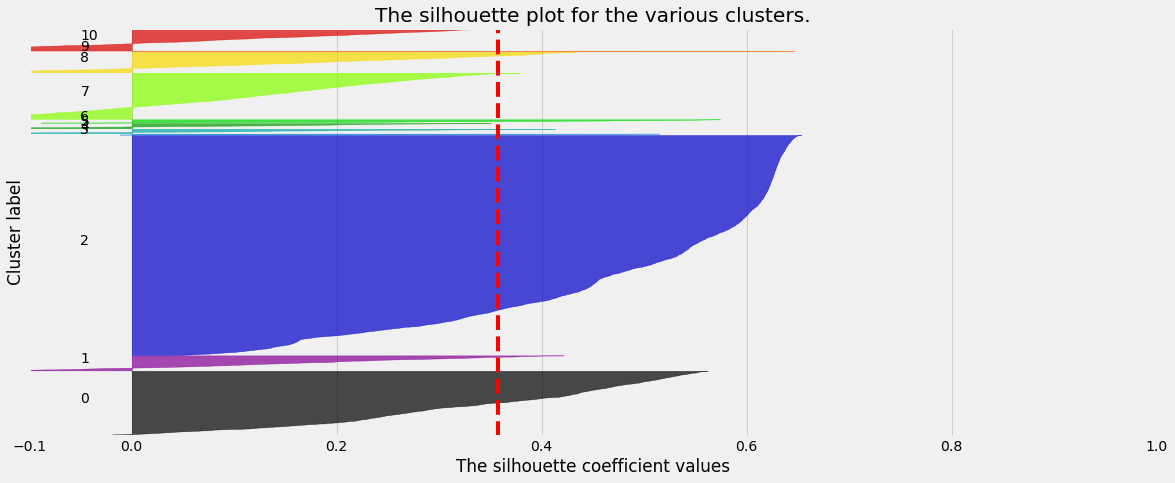

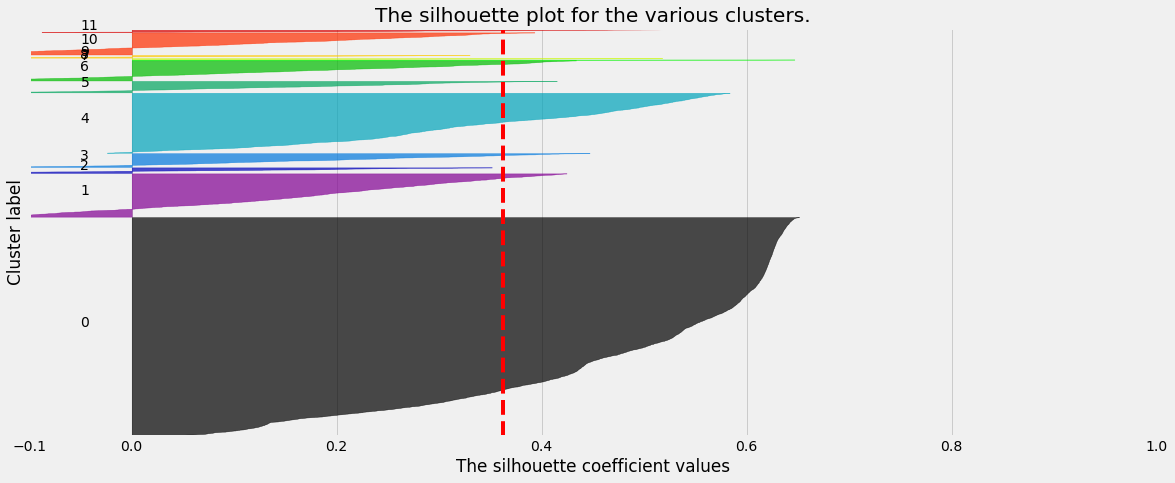

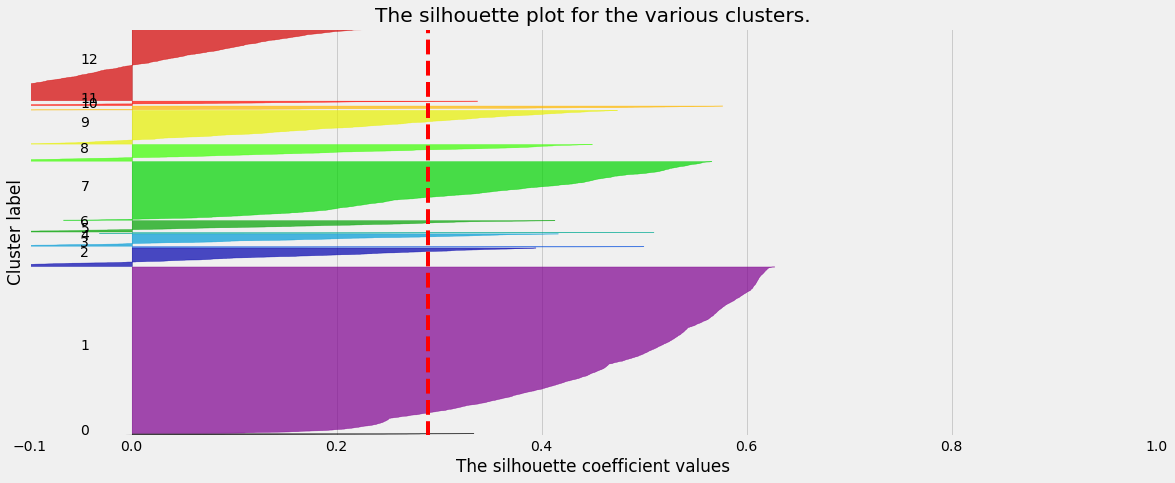

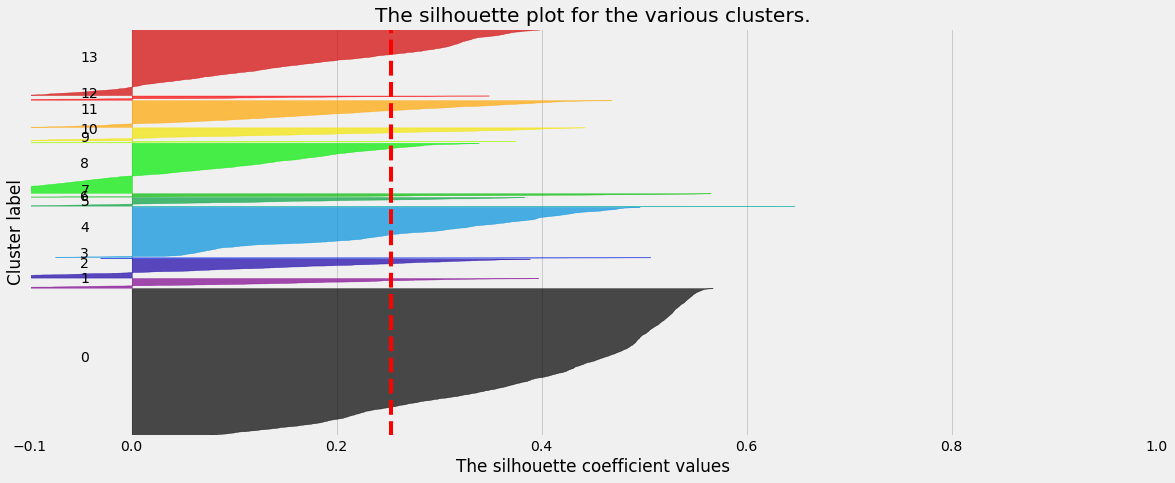

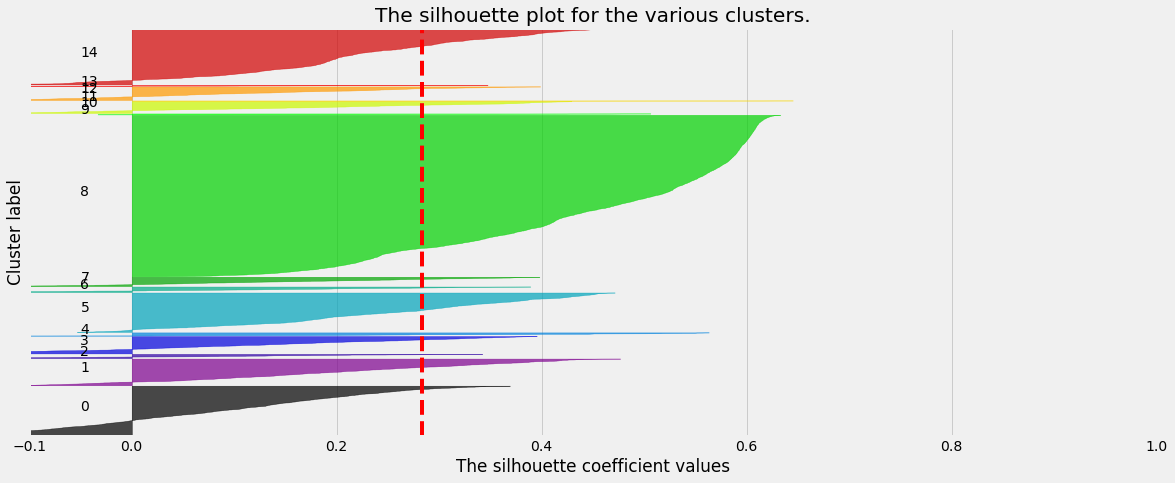

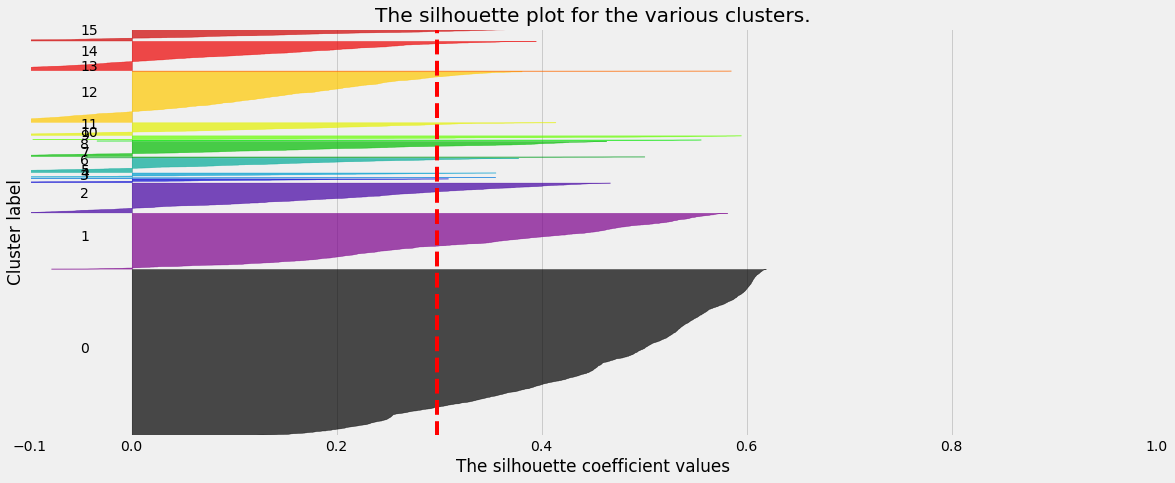

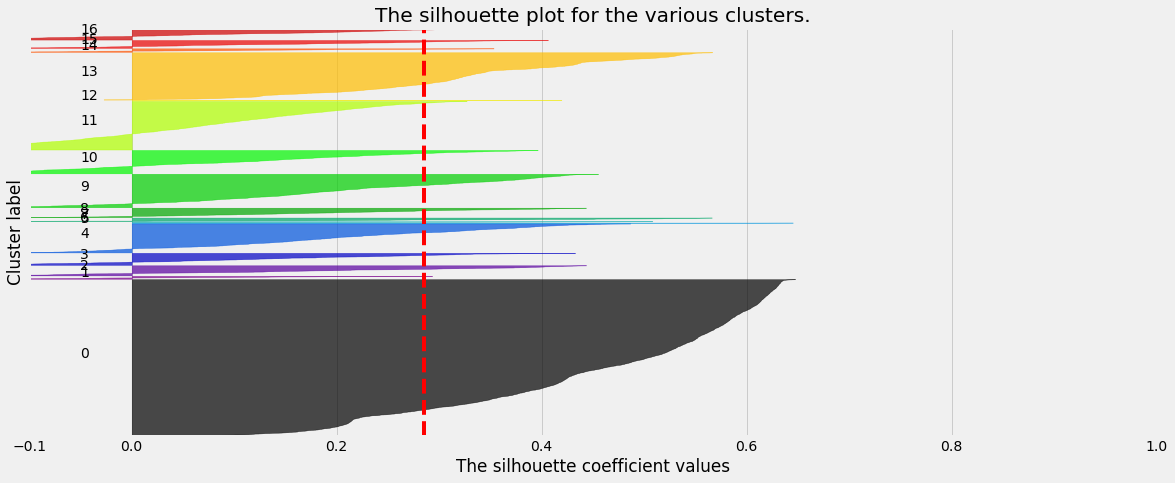

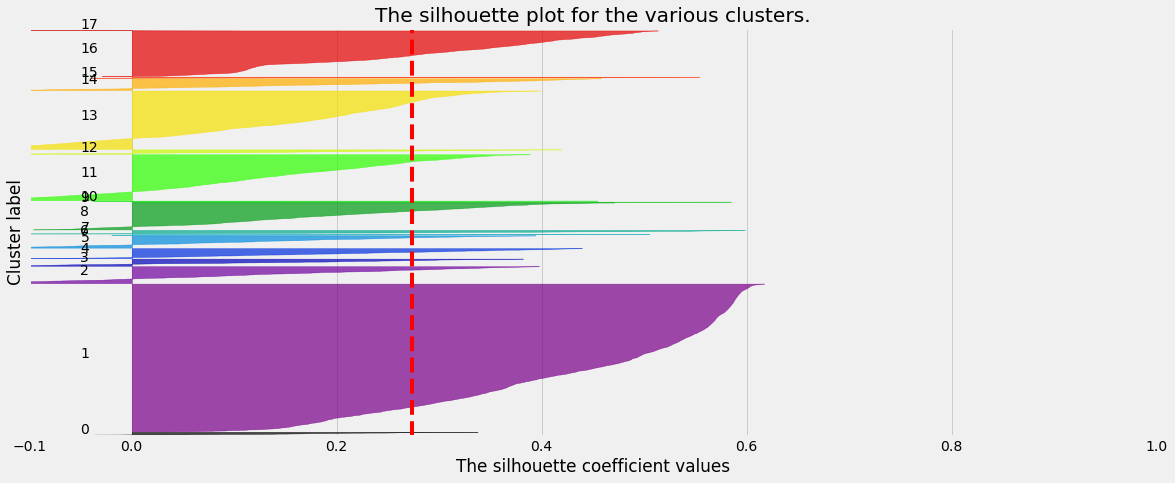

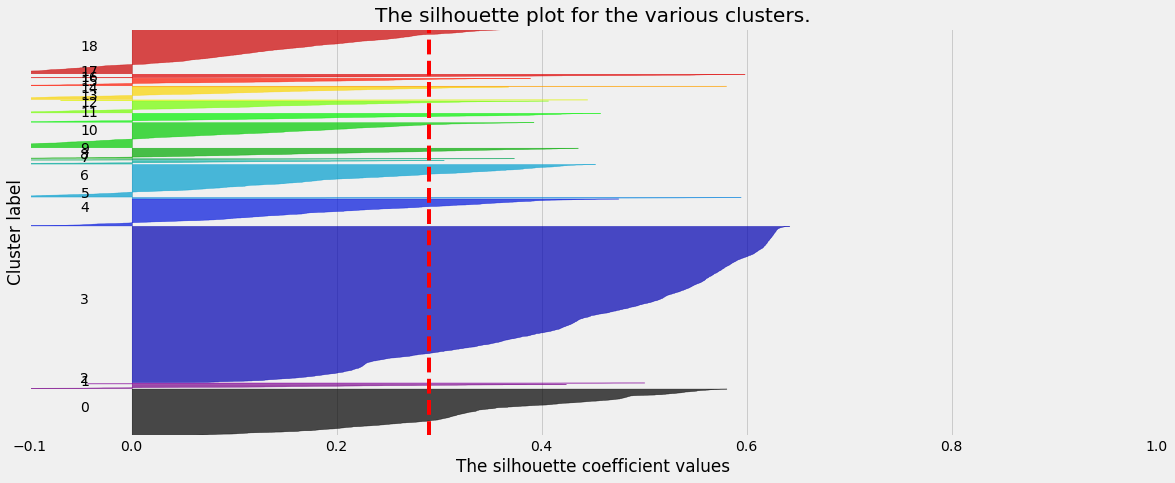

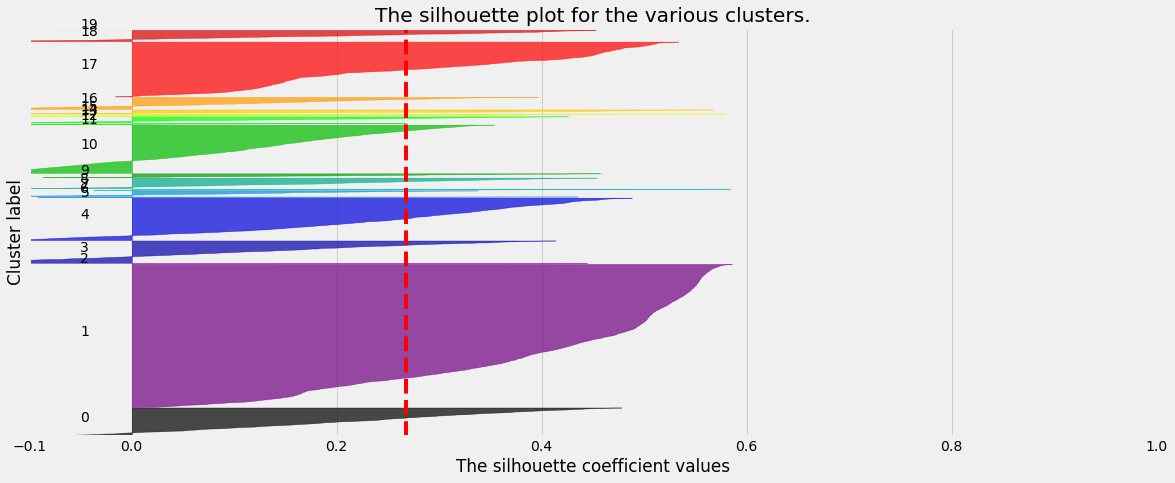

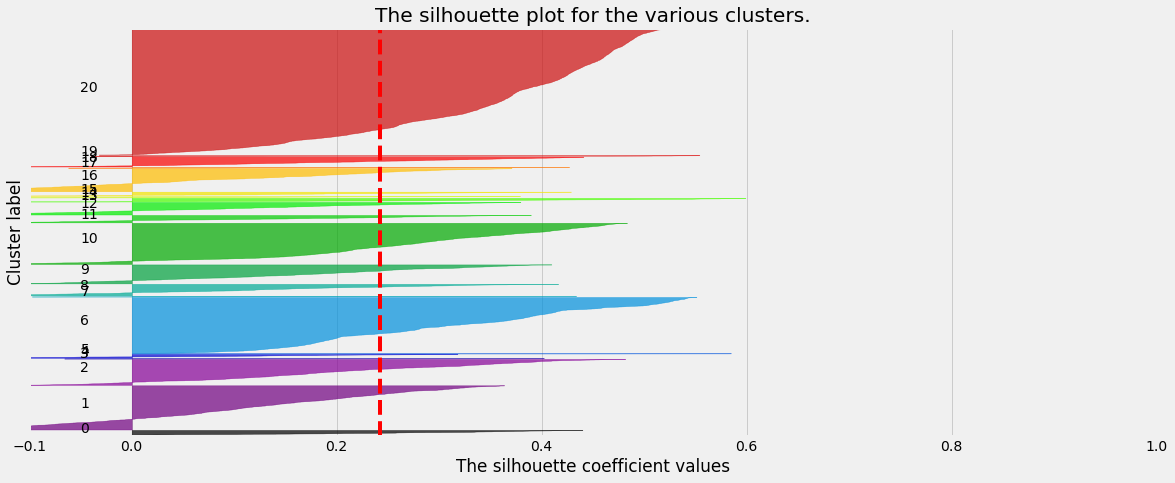

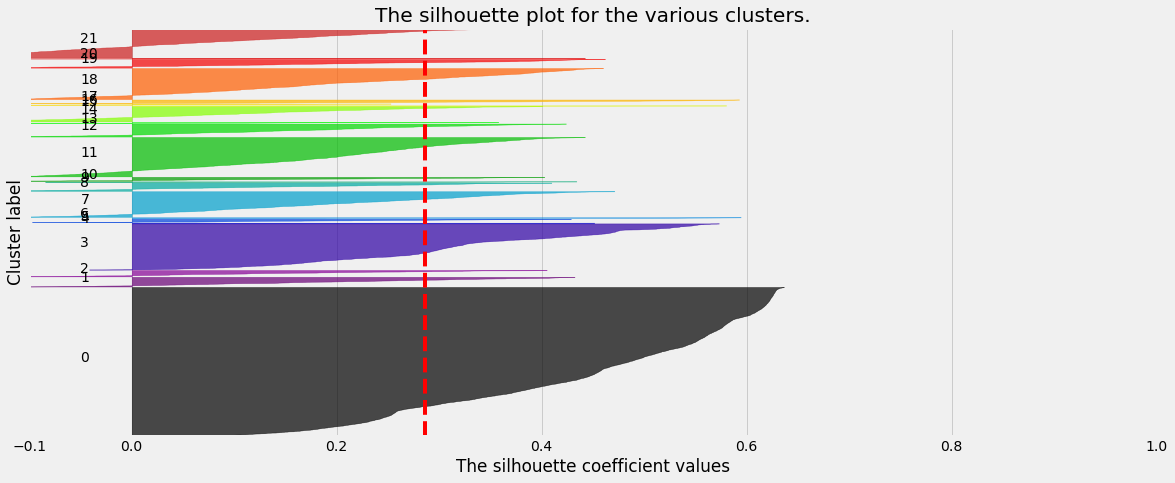

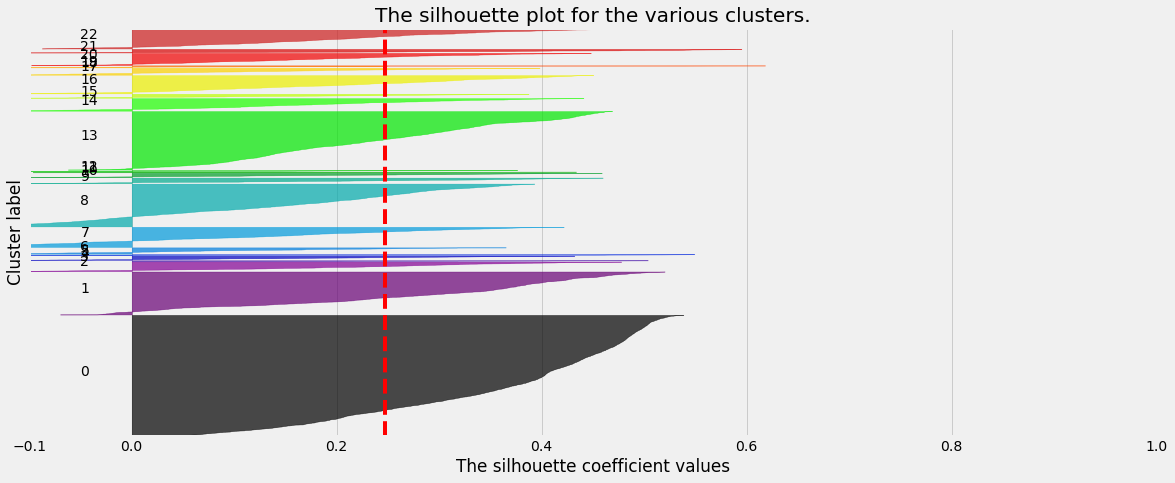

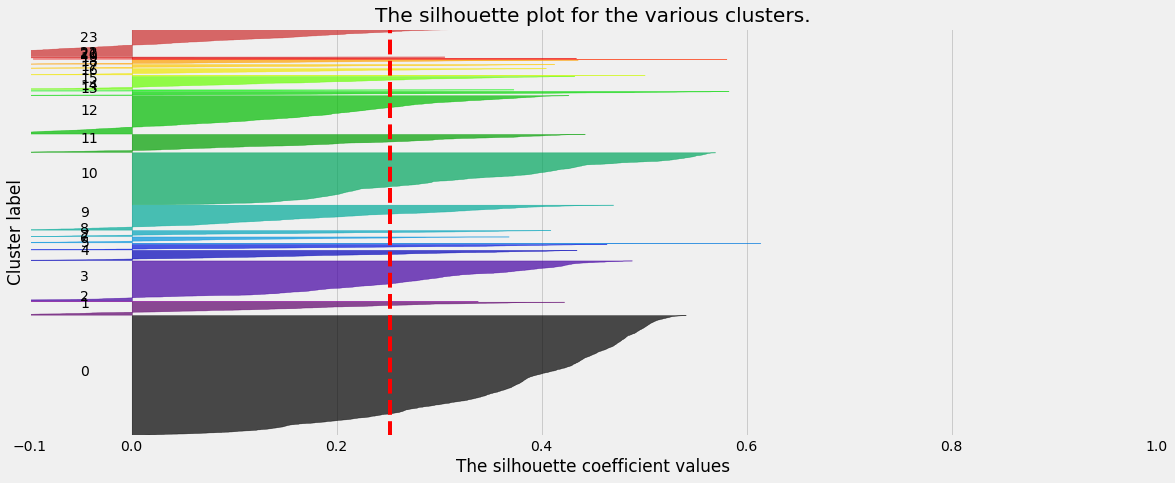

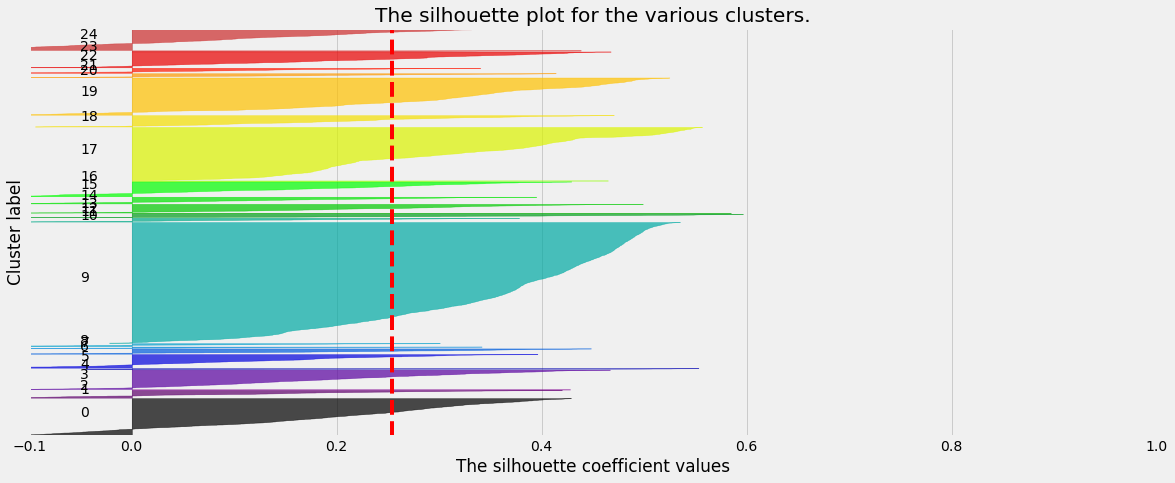

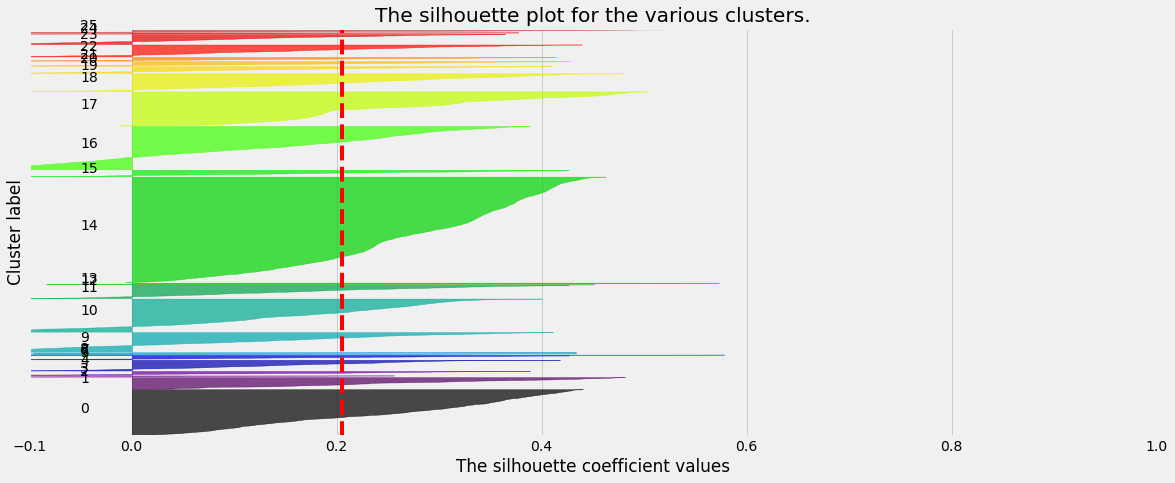

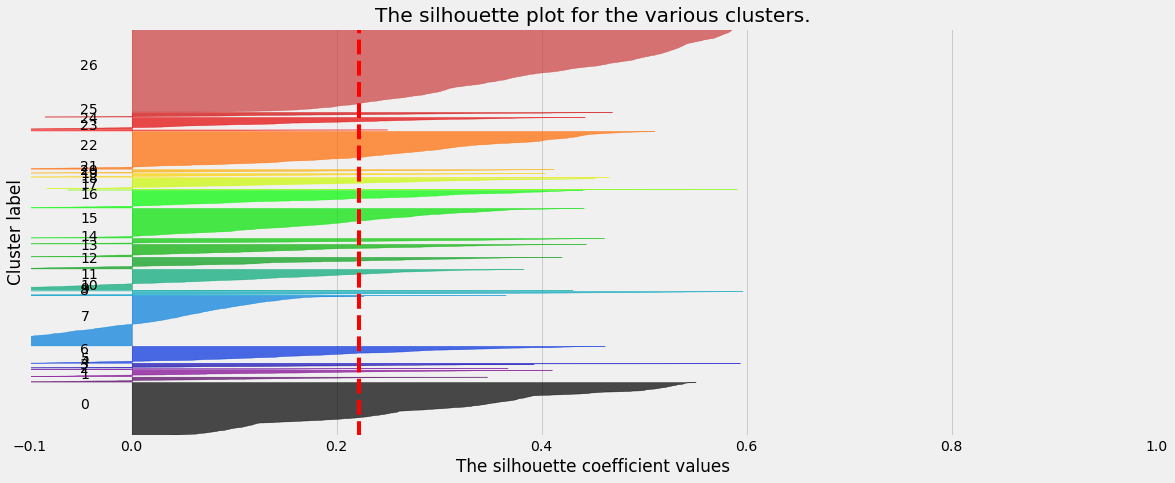

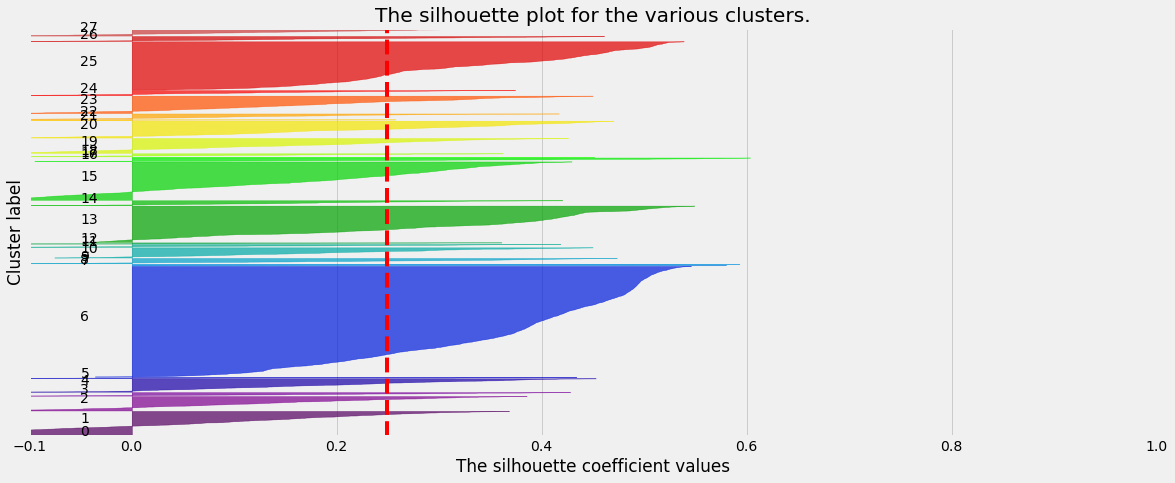

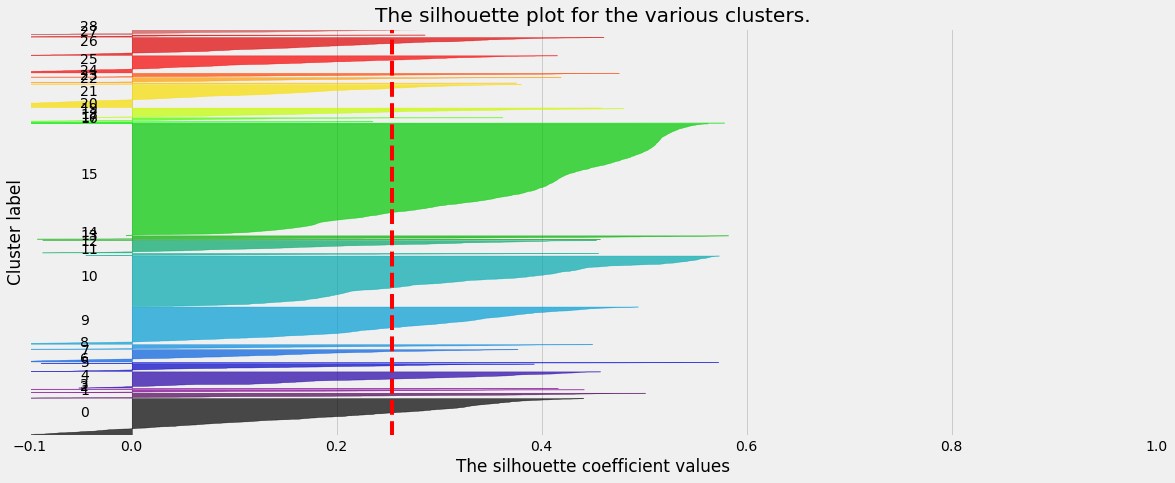

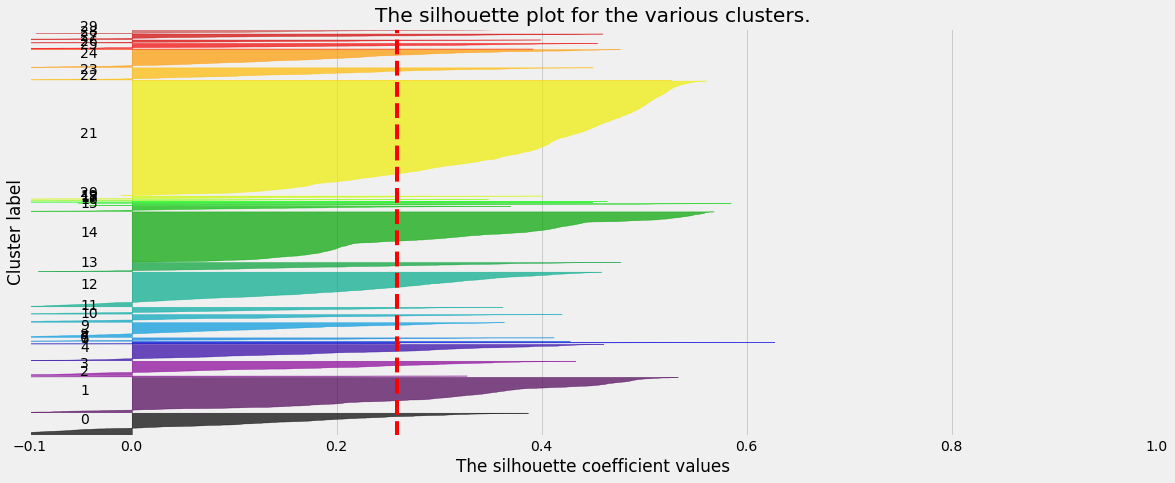

In [21]:
cluster_num_list=range(5,31)
silhouette_avg_list=[]

for n_clusters in cluster_num_list:
    
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(sdf) + (n_clusters + 1) * 10])

    #CLUSTER THE DATA
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(sdf)
    cluster_labels = kmeans.labels_
    
    #FINDS THE AVERAGE SILHOUETTE SCORE
    silhouette_avg = silhouette_score(sdf, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(sdf, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

Text(0.5, 0, 'Number of Clusters Requested in Clustering Algorithm')

Text(0, 0.5, 'Average Silhouette Coefficient Value (out of all objects in the clustering)')

Text(0.5, 1.0, 'Average Silhouette Score Method')

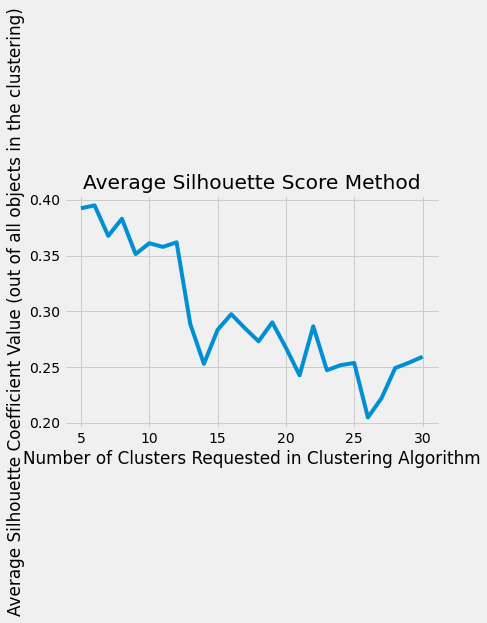

In [22]:
#Plot it    
plt.plot(cluster_num_list,silhouette_avg_list)
plt.xlabel('Number of Clusters Requested in Clustering Algorithm')
plt.ylabel('Average Silhouette Coefficient Value (out of all objects in the clustering)')
plt.title('Average Silhouette Score Method')
plt.show()

In [23]:
silhouette_avg_list

[0.3924018884572437,
 0.3949889537705811,
 0.3676284012271196,
 0.3829956609458359,
 0.3513240623018321,
 0.36103478774522246,
 0.3577786129173101,
 0.36186907938756646,
 0.2887366216689545,
 0.2528973227500641,
 0.2833572891340332,
 0.2974322940349439,
 0.2848677162678127,
 0.27310502519895413,
 0.290104032647885,
 0.267344485253897,
 0.24263419898388672,
 0.28657392416749095,
 0.24715032399821446,
 0.2517311959470704,
 0.2536804560600629,
 0.20481493883512655,
 0.22219330422187386,
 0.24919165704397744,
 0.25389973778358244,
 0.25925700064928214]

Even though, 5th cluster model give the highest score, I want somewhere k over 25 from the elbow plot. So I choose K = 30, which has the highest silhouette score among k over 25.

### Results with chosen parameter

In [24]:
tsne = TSNE(n_components=2, perplexity=40, random_state=1000)
data_tsne = tsne.fit_transform(sdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=X.index)
dff = pd.concat([X, df_tsne], axis=1)

In [25]:
kmeans=KMeans(n_clusters=30, max_iter = 1000, random_state = 1000)
Y_pred = kmeans.fit_predict(sdf)

df_km = pd.DataFrame(Y_pred, columns = ["prediction"], index = X.index)
kmdff = pd.concat([dff, df_km], axis =1)

<AxesSubplot:xlabel='x', ylabel='y'>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

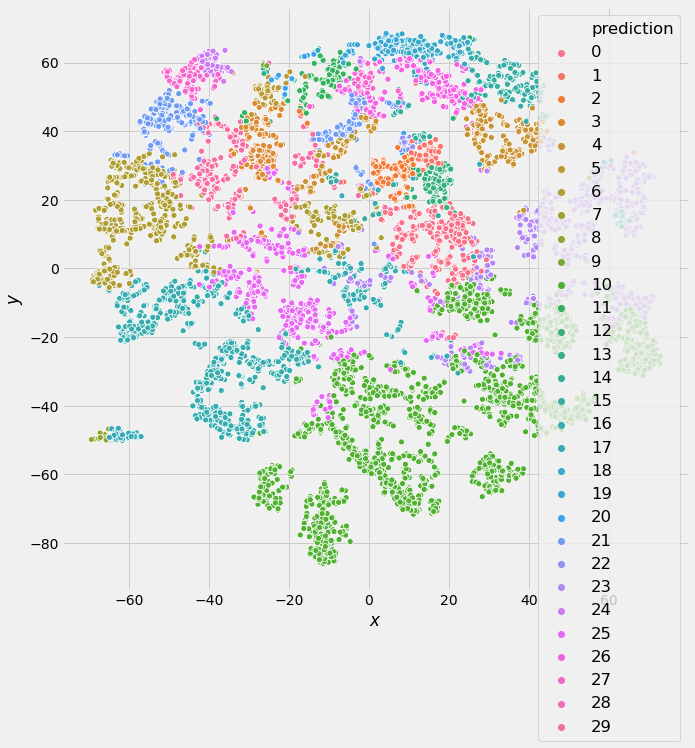

In [26]:
# Show the diagram
fig, ax = plt.subplots(figsize=(10, 10))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    palette=sns.color_palette("husl", 30),
                    hue='prediction',
                    sizes=(30, 400),
                    data=kmdff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

In [27]:
kmdff.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'x', 'y', 'prediction'],
      dtype='object')

In [28]:
kmdff_final = kmdff[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'prediction']]

In [29]:
kmdff_final.prediction.value_counts()

10    2325
16    1042
23     909
6      737
25     518
4      363
21     335
0      326
29     307
15     253
26     236
3      174
27     156
18     136
2      120
12     117
11     113
19      80
17      76
24      72
1       64
5       63
22      25
8       24
20      23
13      15
14      14
9        6
7        6
28       2
Name: prediction, dtype: int64

As there are total 30 clusters, let's see clusters that contains more than 300 points.

In [30]:
# cluster includes more than 300
kmdff_chosen = kmdff_final[(kmdff_final["prediction"] == 10) | (kmdff_final["prediction"] == 16) | (kmdff_final["prediction"] == 23) | (kmdff_final["prediction"] == 6) | (kmdff_final["prediction"] == 25) | (kmdff_final["prediction"] == 4) | (kmdff_final["prediction"] == 21) | (kmdff_final["prediction"] == 0) | (kmdff_final["prediction"] == 29)]

In [31]:
kmdff_chosen.prediction.value_counts()

10    2325
16    1042
23     909
6      737
25     518
4      363
21     335
0      326
29     307
Name: prediction, dtype: int64

In [32]:
kmdff_chosen.prediction.unique()

array([10, 21, 23,  6, 25, 29, 16,  4,  0], dtype=int32)

In [33]:
kmdff_chosen.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'prediction'],
      dtype='object')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'BALANCE_FREQUENCY \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_FREQUENCY \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'ONEOFF_PURCHASES_FREQUENCY \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_INSTALLMENTS_FREQUENCY \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CASH_ADVANCE_TRX \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PURCHASES_TRX \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'CREDIT_LIMIT \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PAYMENTS \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'MINIMUM_PAYMENTS \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'PRC_FULL_PAYMENT \n29')

<Figure size 2160x216 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n0')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n4')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n6')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n10')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n16')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n21')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n23')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n25')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'TENURE \n29')

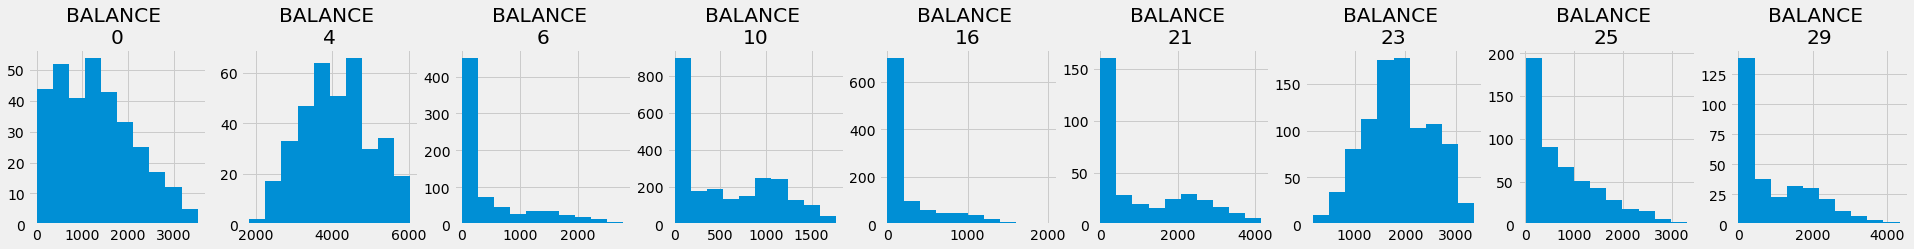

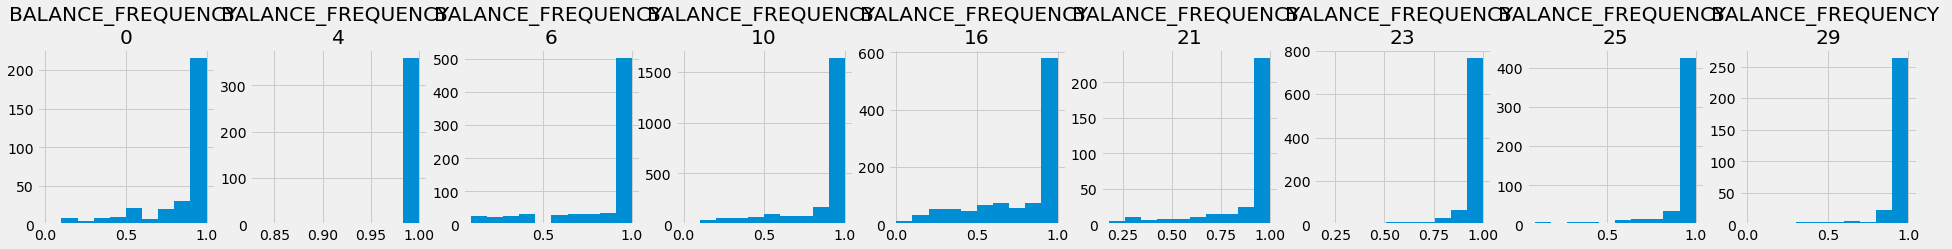

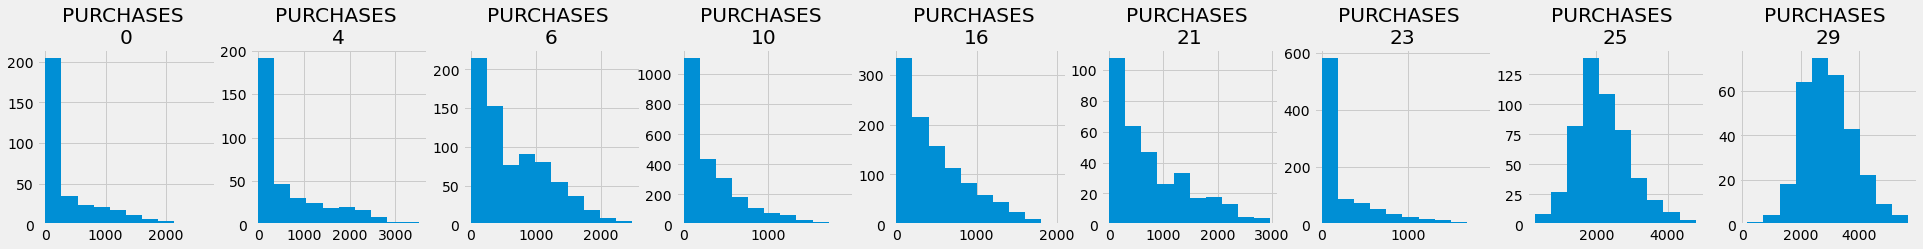

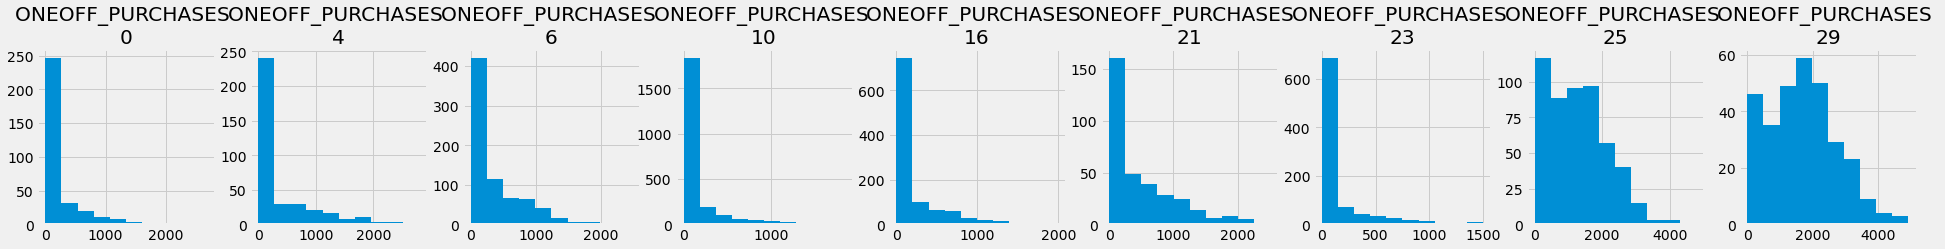

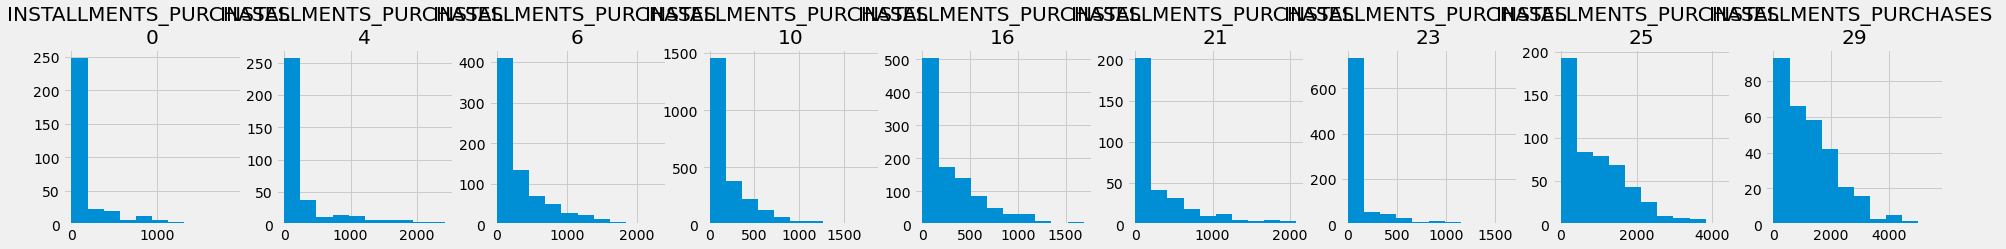

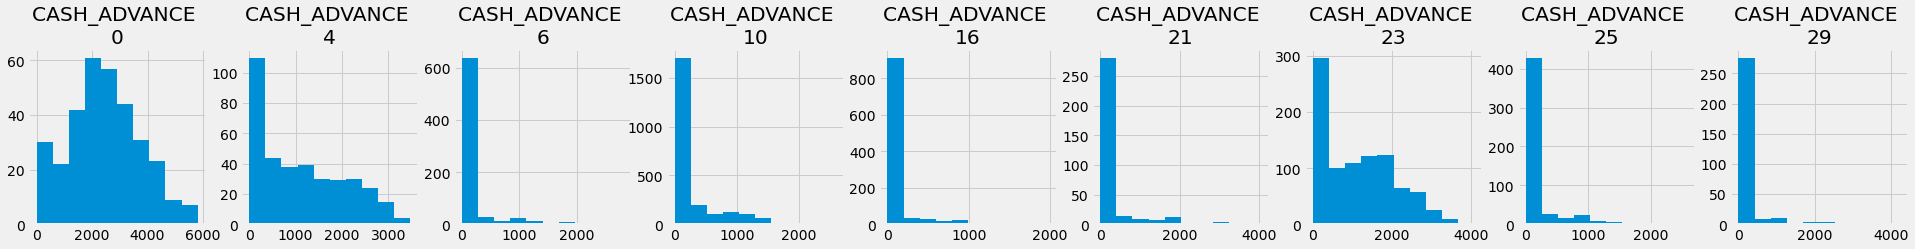

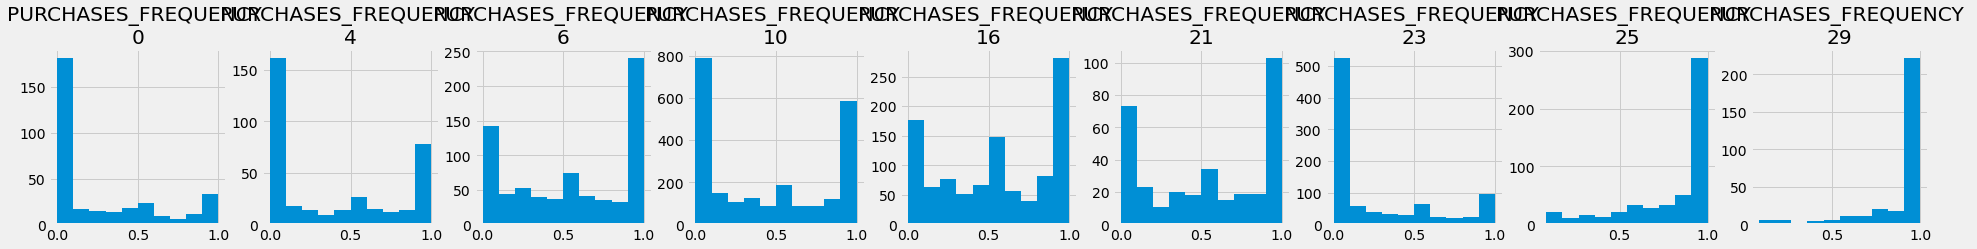

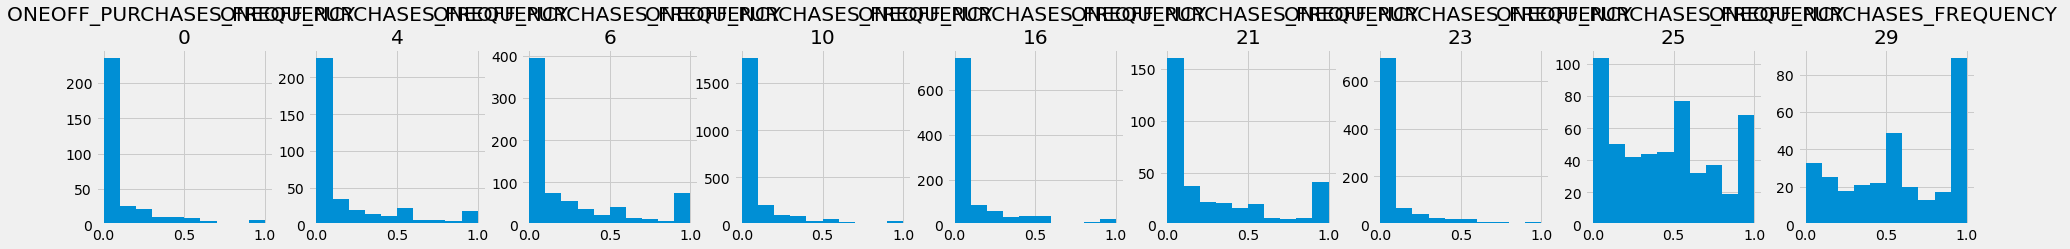

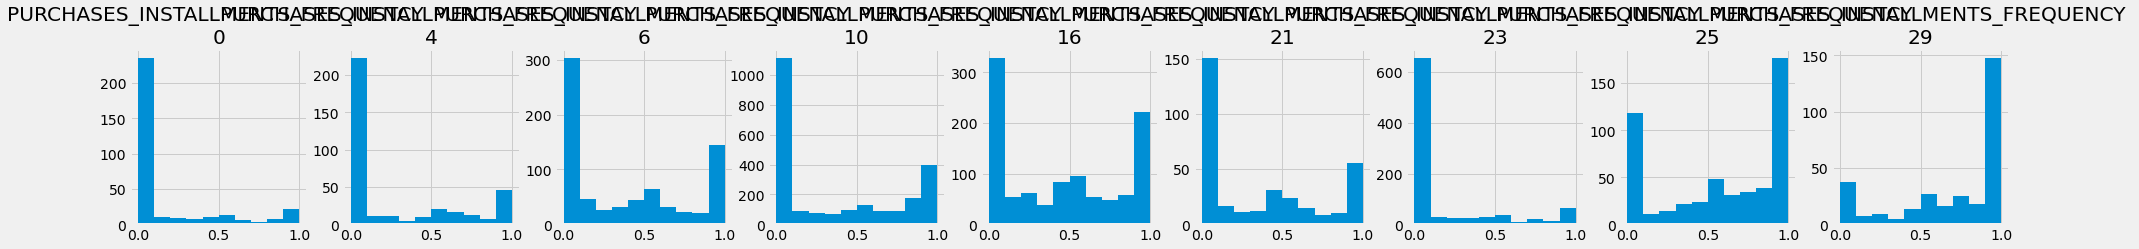

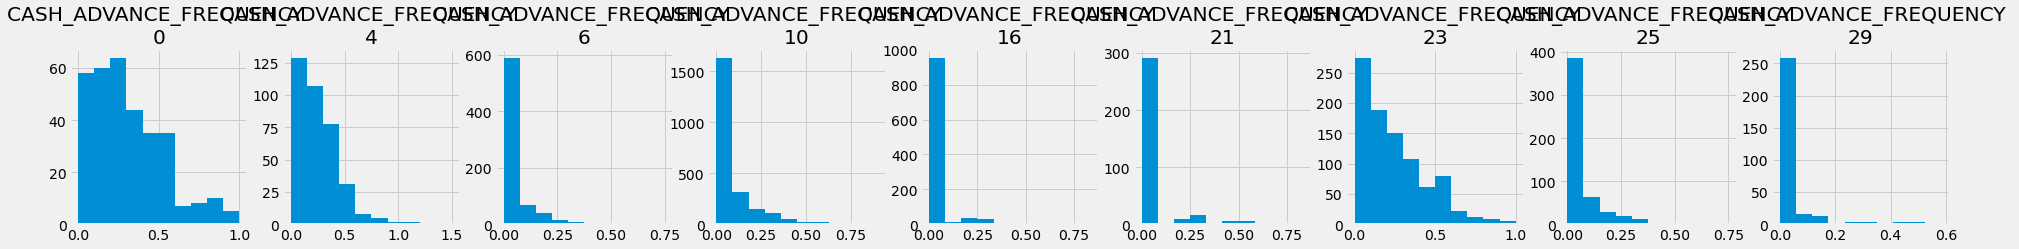

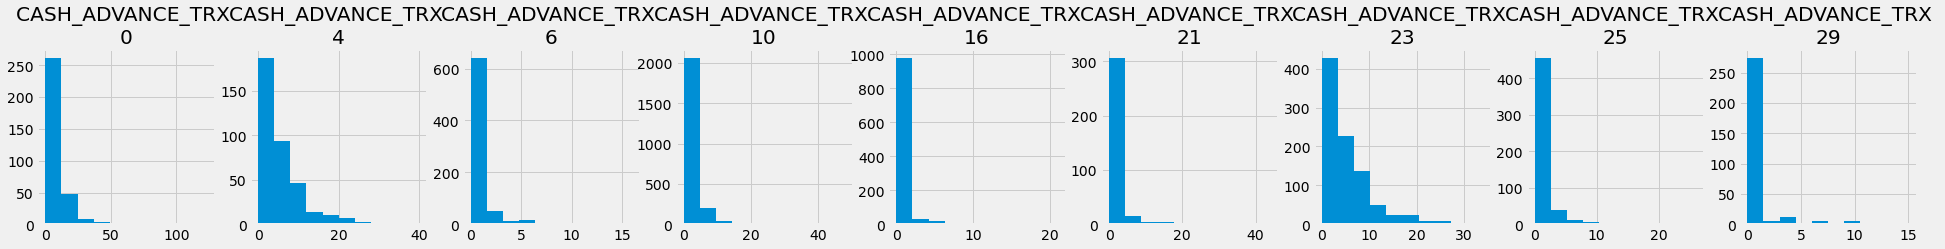

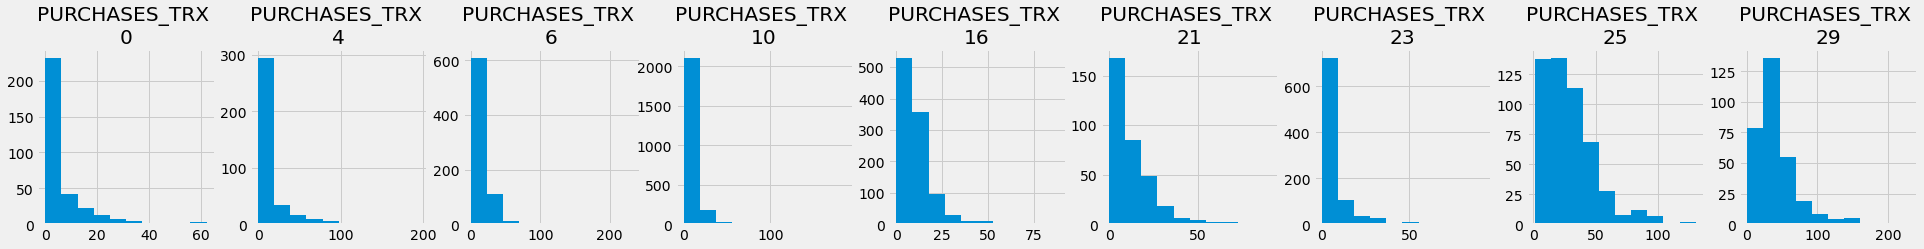

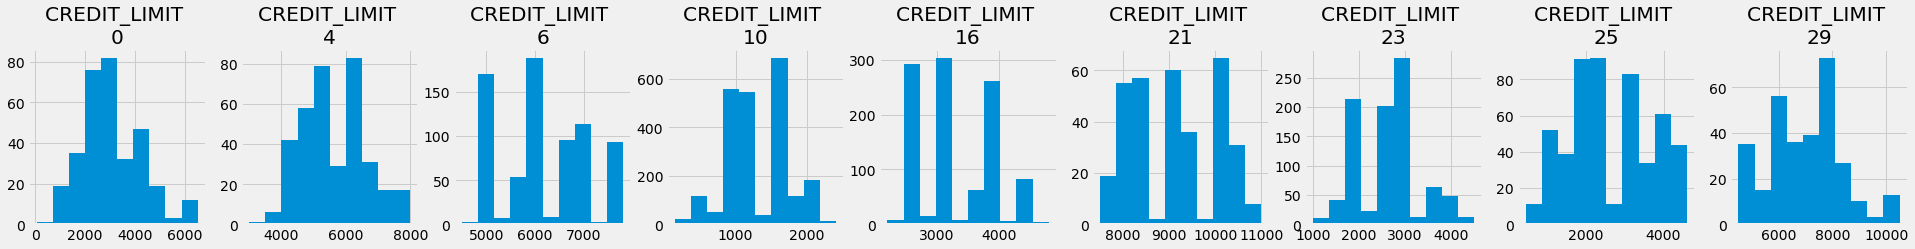

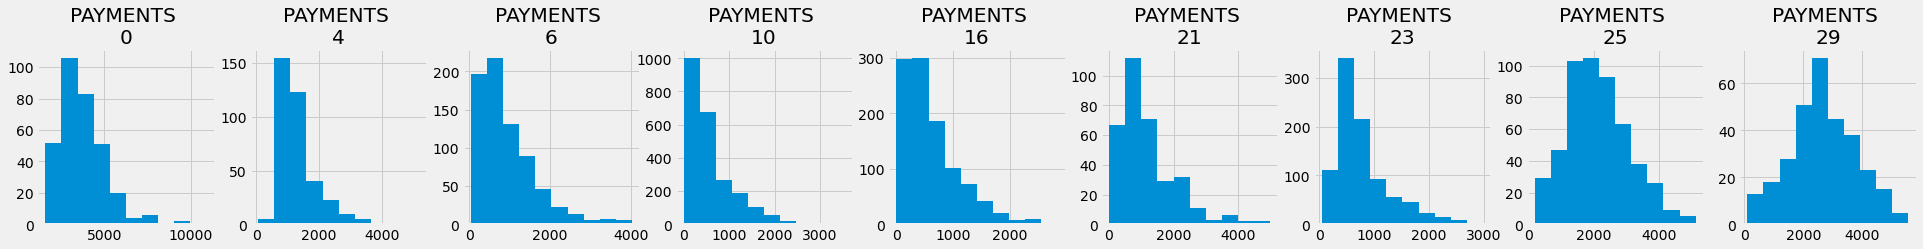

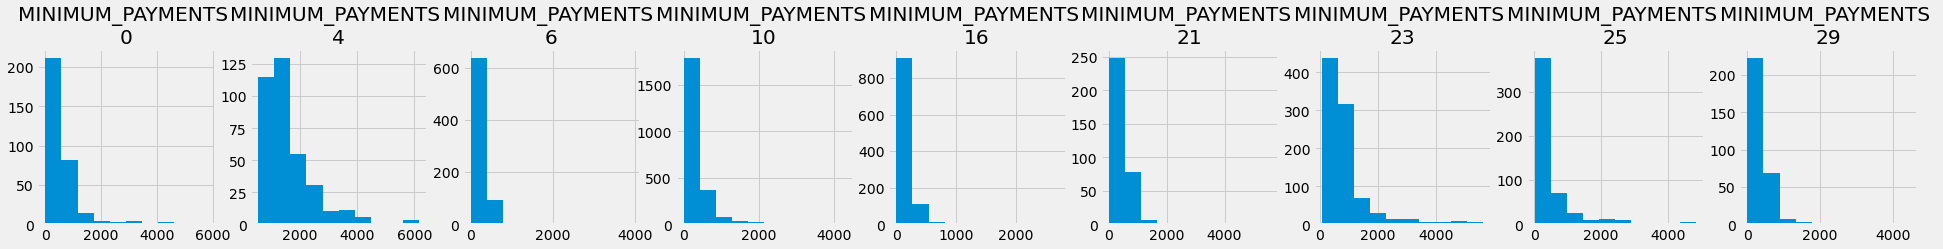

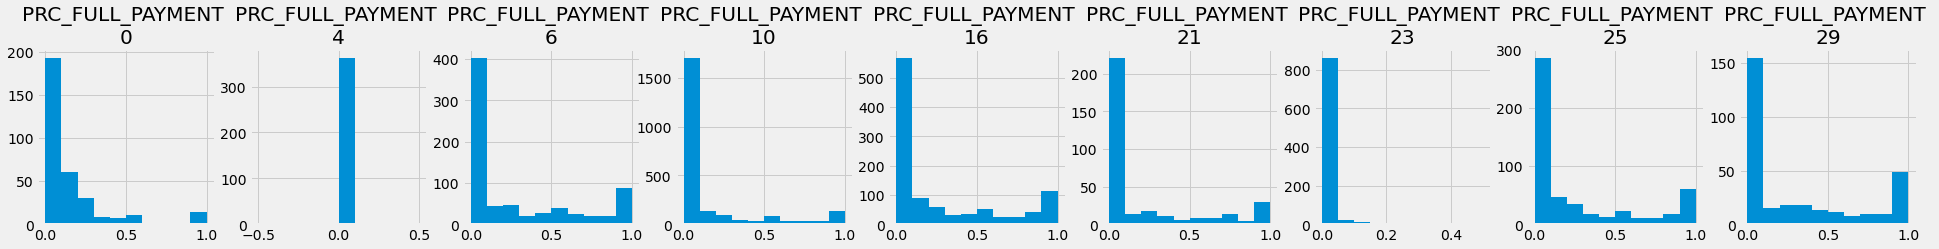

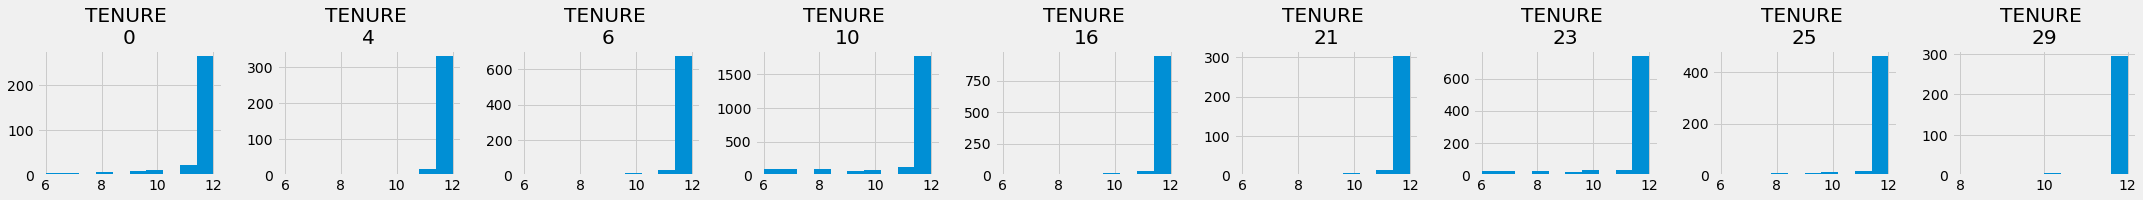

In [34]:
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

pred_dict = { 0 : "0", 1 : "4", 2 : "6", 3 : "10", 4 : "16", 5 : "21", 6 : "23",7: "25", 8 : "29"}

for column in col_list:
    plt.figure(figsize=(30,3))
    for i in range(0,9):
        plt.subplot(1,9,i+1)
        cluster = kmdff_chosen[kmdff_chosen['prediction']== int(pred_dict[i])]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, int(pred_dict[i])))
        
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='prediction', ylabel='BALANCE'>

Text(0.5, 1.0, 'Distribution of the BALANCE')

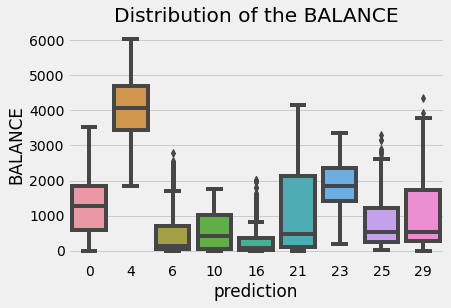

<AxesSubplot:xlabel='prediction', ylabel='PURCHASES'>

Text(0.5, 1.0, 'Distribution of the PURCHASES')

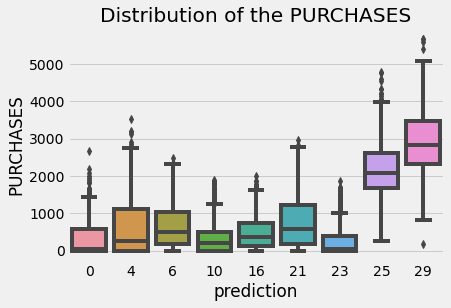

<AxesSubplot:xlabel='prediction', ylabel='CASH_ADVANCE'>

Text(0.5, 1.0, 'Distribution of the CASH_ADVANCE')

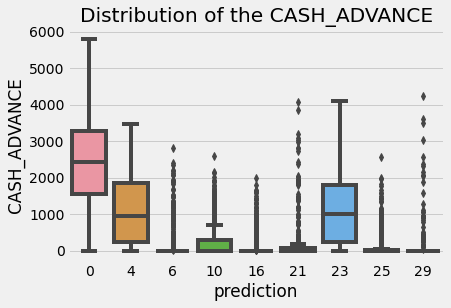

<AxesSubplot:xlabel='prediction', ylabel='PURCHASES_FREQUENCY'>

Text(0.5, 1.0, 'Distribution of the PURCHASES_FREQUENCY')

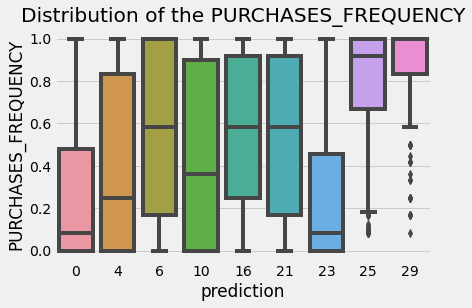

<AxesSubplot:xlabel='prediction', ylabel='CREDIT_LIMIT'>

Text(0.5, 1.0, 'Distribution of the CREDIT_LIMIT')

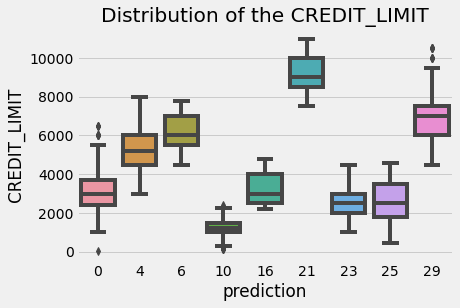

<AxesSubplot:xlabel='prediction', ylabel='INSTALLMENTS_PURCHASES'>

Text(0.5, 1.0, 'Distribution of the INSTALLMENTS_PURCHASES')

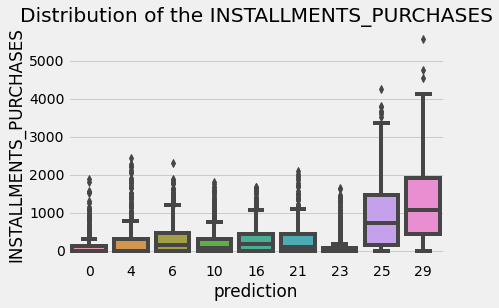

<AxesSubplot:xlabel='prediction', ylabel='PAYMENTS'>

Text(0.5, 1.0, 'Distribution of the PAYMENTS')

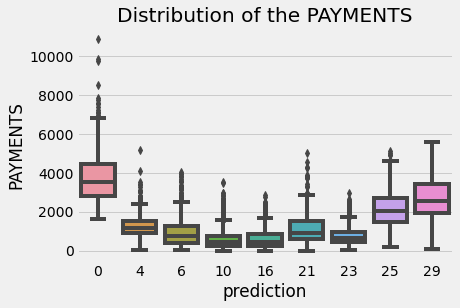

<AxesSubplot:xlabel='prediction', ylabel='MINIMUM_PAYMENTS'>

Text(0.5, 1.0, 'Distribution of the MINIMUM_PAYMENTS')

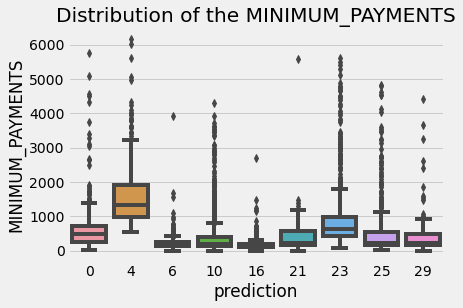

In [35]:
for col in ['BALANCE', 'PURCHASES',  "CASH_ADVANCE", 'PURCHASES_FREQUENCY','CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'PAYMENTS', "MINIMUM_PAYMENTS"]:
    sns.boxplot(x="prediction", y=col, data=kmdff_chosen)
    plt.title('Distribution of the %s' %col)
    plt.show()

### Post-Analysis Quetions

#### Cluster Attributes

Description of stand out clusters:
- Cluster 10, 6, 16: According to the number of points assigned at cluster 10, we can say this is the most common types of customer. To be specific, this group indicates a large group of customers who pay small with the low minimum payment and the lowest limit of credit card. Customer of 6 and 16 are similar to cluster, only have small differences in credit limit.
- Cluster 23: This segment has second highest mean of balance and payment amounts, also purchase most frequently compared to other groups. In contrast, it seems like they don't really use cash follwed by low cash advance.
- Cluster 25, 29: This two groups of custmer have relatively small balance amount, but have a high purchase frequency, and pay a lot compared to others with a high installment. Looks like they like to buy something. Comparing these two groups, cluster of 29 tends to make purchase more frequently, and increase credit limits to follow their payments.
- Cluster 4: This customer group has high balance and cash advances. But high amounts of minimum payments, which can be interpreted that they don't really make payments, but when they make payments, they pay a lot at once.
- Cluster 21: This customers has the highest limit of credit card, except that have similar behavior with group of 10.
- Cluster 0: This group has the frequently use the cash in advance being paid highest along with cash in advance given by the user. This points out that customer use credit cards as a loan.


#### Distance

In [36]:
kmdff_sort = kmdff_chosen.sort_values(by = ["prediction"])
kmdff_sort = kmdff_sort.drop(["prediction"], axis = 1)

(0.0, 6862.0)

(0.0, 6862.0)

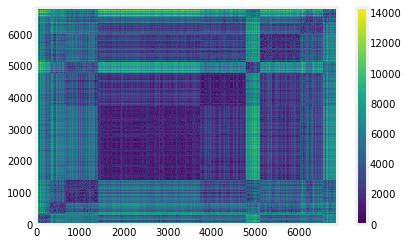

In [37]:
#Create a distance matrix
%matplotlib inline
dist_mat = squareform(pdist(kmdff_sort))
N = len(kmdff_sort)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

We can see a large cluster in the middle [1700,5000], this is cluster of 10,16 and 21 which are around 3000 points. So, cluster 10, 16 and 21 are close each other.


## 3.2 DBSCAN

In [38]:
# Standardize the dataset (aka: subtract the mean from each attribute)
ss = StandardScaler(with_std=False)
sdf = ss.fit_transform(X)

### Choosing minpts parameter

Text(0.5, 0, 'Points Sorted by Distance to k=2 Nearest Neighbor')

Text(0, 0.5, 'k=2 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

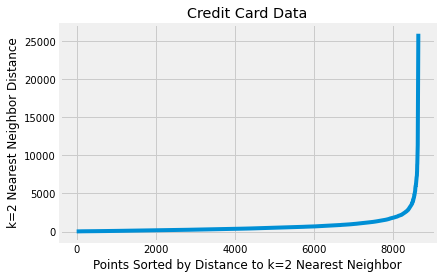

Text(0.5, 0, 'Points Sorted by Distance to k=3 Nearest Neighbor')

Text(0, 0.5, 'k=3 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

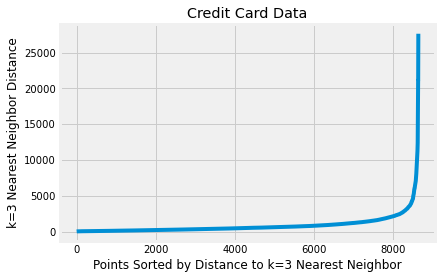

Text(0.5, 0, 'Points Sorted by Distance to k=4 Nearest Neighbor')

Text(0, 0.5, 'k=4 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

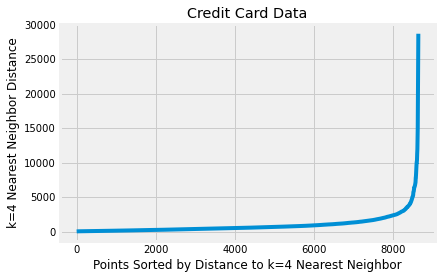

Text(0.5, 0, 'Points Sorted by Distance to k=5 Nearest Neighbor')

Text(0, 0.5, 'k=5 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

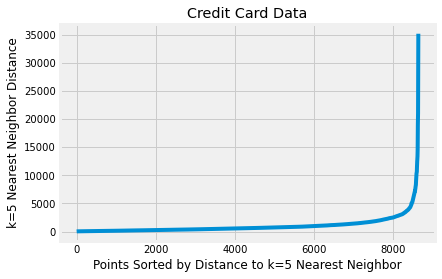

Text(0.5, 0, 'Points Sorted by Distance to k=6 Nearest Neighbor')

Text(0, 0.5, 'k=6 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

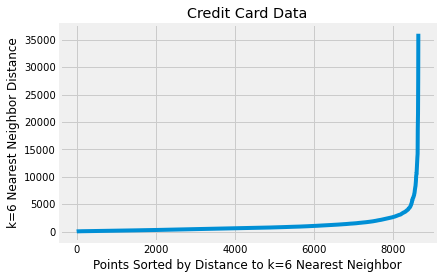

Text(0.5, 0, 'Points Sorted by Distance to k=7 Nearest Neighbor')

Text(0, 0.5, 'k=7 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

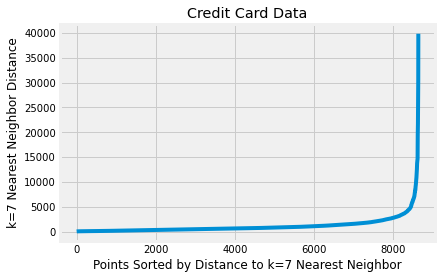

Text(0.5, 0, 'Points Sorted by Distance to k=8 Nearest Neighbor')

Text(0, 0.5, 'k=8 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

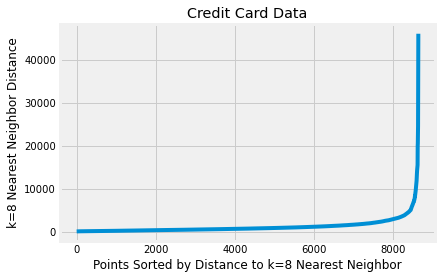

Text(0.5, 0, 'Points Sorted by Distance to k=9 Nearest Neighbor')

Text(0, 0.5, 'k=9 Nearest Neighbor Distance')

Text(0.5, 1.0, 'Credit Card Data')

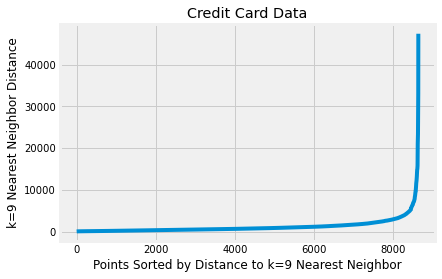

In [39]:
#Find the distance of the kth nearest neighbor
for k in range(2,10):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(sdf)
    distances, indices = nbrs.kneighbors(sdf)

    plt.plot(np.sort(distances.T[k-1]))
    plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
    plt.ylabel('k=%s Nearest Neighbor Distance'%k)
    plt.title('Credit Card Data')
    plt.show()

Whatever k we use, dramatic curve is shown that imply there exist a set of objects in clusters that have relatively similar densities, and noises. 
Let's assume that our clusters are relatively of the same density, Thus I want to pick minpts = 9.
And check silhuette score from $\epsilon$ 2500 to 5000 by 500.
Let's do some more.

### Choosing $\epsilon$ parameter

In [40]:
# Perform the preliminary analysis
n_clusters = []
n_noise_points = []
silhouette_scores = []
calinski_harabaz_scores = []


n_clusters_p = []
n_noise_points_p = []
silhouette_scores_p = []
calinski_harabaz_scores_p = []

for eps in np.arange(100, 2500, 100):
    
    
    dst = DBSCAN(eps=eps, min_samples= 9, metric='euclidean')
    Y_pred_t = dst.fit_predict(X)

    n_clusters_p.append(np.max(Y_pred_t) + 1)
    n_noise_points_p.append(np.sum(Y_pred_t == -1))
    silhouette_scores_p.append(silhouette_score(X, Y_pred_t, metric='euclidean'))
    calinski_harabaz_scores_p.append(calinski_harabaz_score(X, Y_pred_t))

n_clusters.append(n_clusters_p)
n_noise_points.append(n_noise_points_p)
silhouette_scores.append(silhouette_scores_p)
calinski_harabaz_scores.append(calinski_harabaz_scores_p)

In [41]:
n_clusters

[[13, 22, 16, 13, 9, 5, 6, 9, 9, 4, 5, 4, 3, 6, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1]]

Text(0.5, 1.0, 'Number of clusters')

Text(0.5, 1.0, 'Number of noise points')

Text(0.5, 1.0, 'Silhouette score')

Text(0.5, 1.0, 'Calinski-Harabasz score')

No handles with labels found to put in legend.


Text(0.5, 0, '$\\epsilon$')

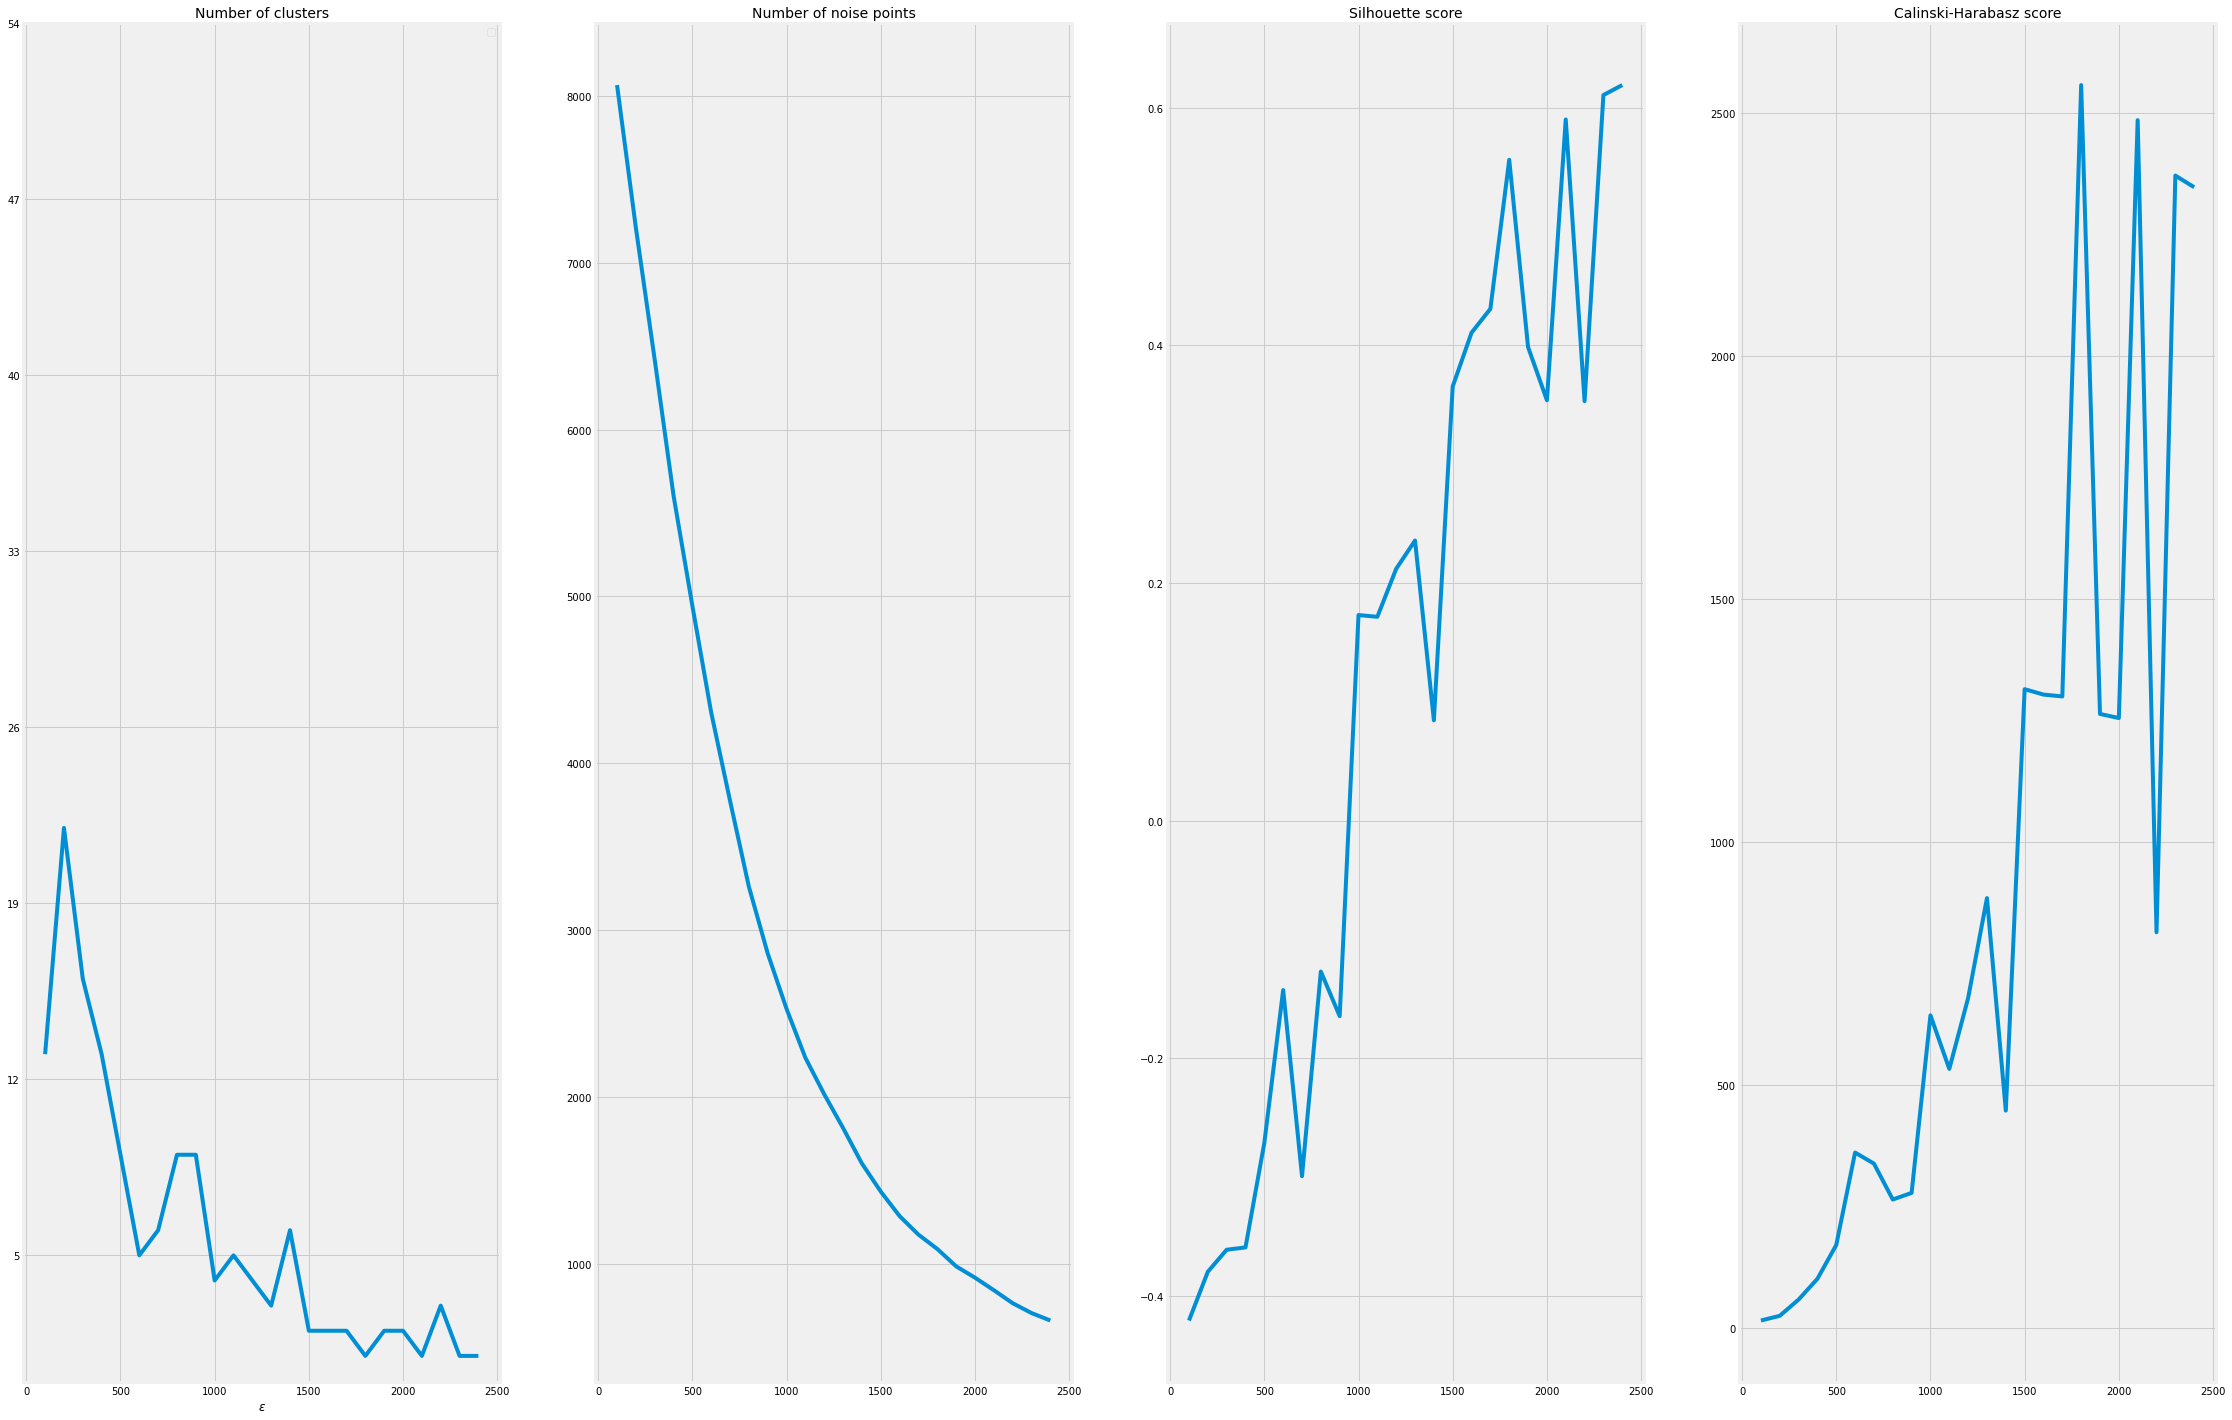

In [42]:
# Show the results of the preliminary analysis
fig, ax = plt.subplots(1, 4, figsize=(35, 25), sharex=True)

x = np.arange(100, 2500, 100)

ax[0].plot(x, n_clusters[0])
ax[1].plot(x, n_noise_points[0])
ax[2].plot(x, silhouette_scores[0])
ax[3].plot(x, calinski_harabaz_scores[0])

ax[0].set_title('Number of clusters', fontsize=14)
ax[1].set_title('Number of noise points', fontsize=14)
ax[2].set_title('Silhouette score', fontsize=14)
ax[3].set_title('Calinski-Harabasz score', fontsize=14)

ax[0].set_yticks(np.arange(5, 60, 7))
ax[0].legend()
ax[0].set_xlabel(r'$\epsilon$')

plt.show()

* These three plots tell us:
    - As we increase $\epsilon$, the number of noise decreases, that's why silhouette score peaks the high with the lowest number of noises. Then, clustered into 1 cluster.
    - This suggest that using silhouette score to choose parameter is not a good idea.
    - Also $\epsilon$ value of around 1750 gives us the largest Calinski-Harabasz score, but 1 cluster.
    - Let's see the next step and see which parameter is the best.
    

### Results with chosen parameter

Number of clusters: 22
Number of noise points: 7210


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Silhouette score: -0.380
Calinski-Harabaz score: 25.747


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

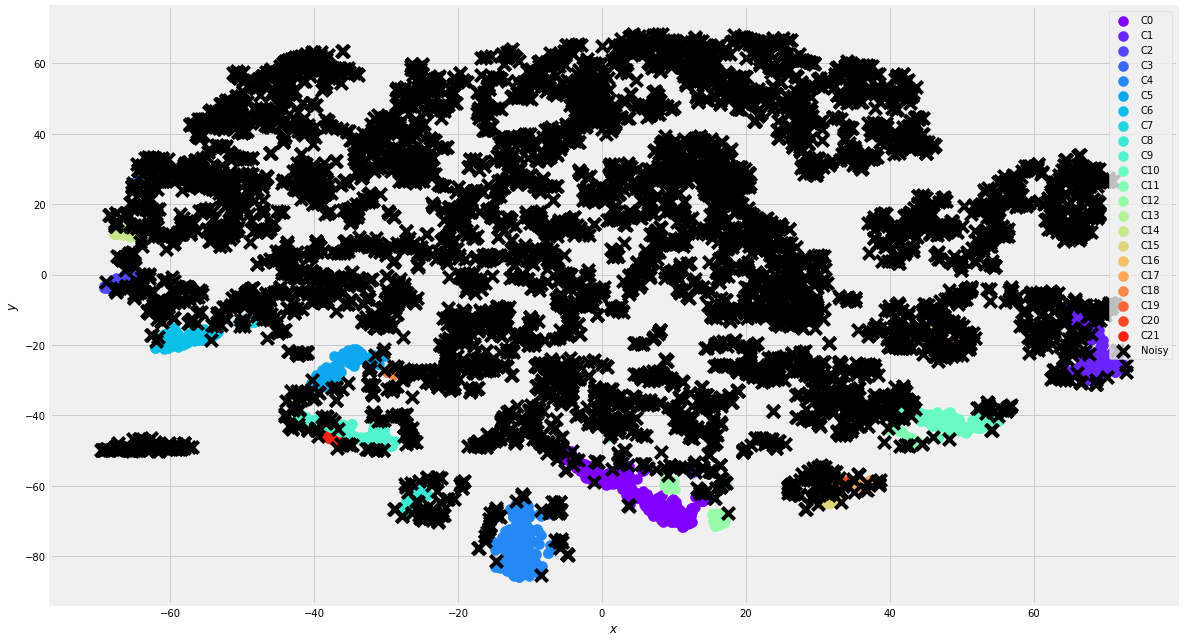

In [43]:
# Perform the clustering
dbscan = DBSCAN(eps=200, min_samples=9, metric='euclidean')
Y_pred = dbscan.fit_predict(sdf)

print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred == -1)))

print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred, metric='euclidean')))
print('Calinski-Harabaz score: {:.3f}'.format(calinski_harabaz_score(dff, Y_pred)))

# Show the clustering results
fig, ax = plt.subplots(figsize=(18, 11))

n_clusters=np.max(np.unique(Y_pred)) + 1



for i in range(n_clusters):
    color = cm.rainbow(float(i) / n_clusters)
    ax.scatter(data_tsne[Y_pred == i, 0], data_tsne[Y_pred == i, 1], s=100, c=color,
                label='C{}'.format(i))

ax.scatter(data_tsne[Y_pred == -1, 0], data_tsne[Y_pred == -1, 1], marker='x', c='black', s=150, label='Noisy')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

Number of clusters: 9
Number of noise points: 2859


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Silhouette score: -0.165
Calinski-Harabaz score: 278.549


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

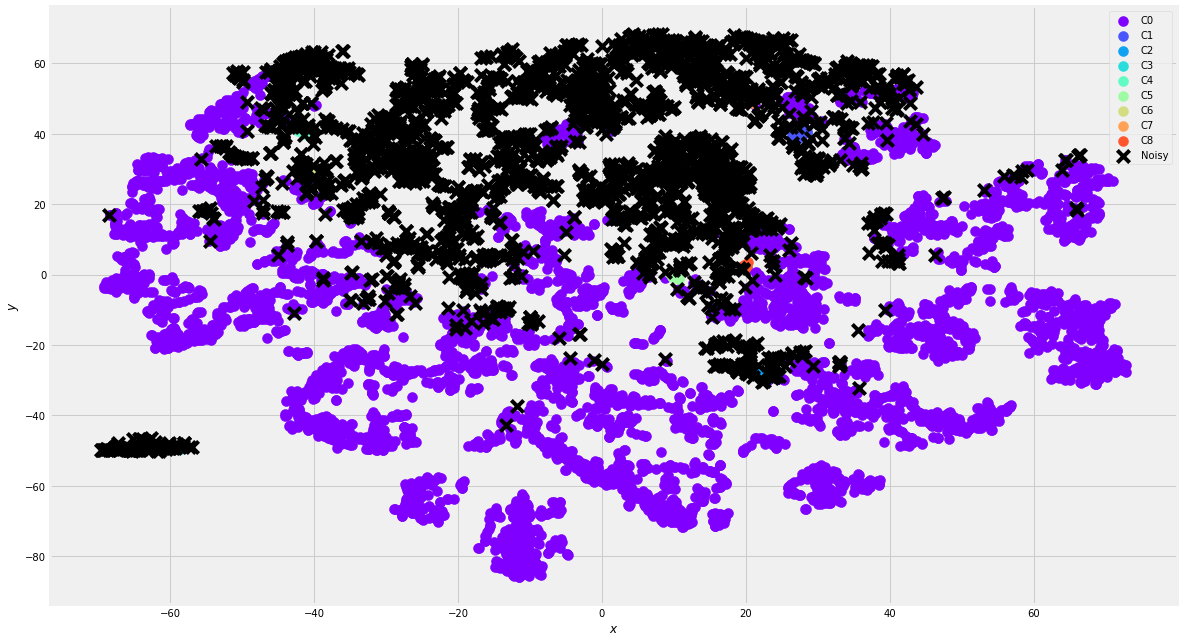

In [44]:
# Perform the clustering
dbscan = DBSCAN(eps=900, min_samples=9, metric='euclidean')
Y_pred = dbscan.fit_predict(sdf)

print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred == -1)))

print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred, metric='euclidean')))
print('Calinski-Harabaz score: {:.3f}'.format(calinski_harabaz_score(dff, Y_pred)))

# Show the clustering results
fig, ax = plt.subplots(figsize=(18, 11))

n_clusters=np.max(np.unique(Y_pred)) + 1



for i in range(n_clusters):
    color = cm.rainbow(float(i) / n_clusters)
    ax.scatter(data_tsne[Y_pred == i, 0], data_tsne[Y_pred == i, 1], s=100, c=color,
                label='C{}'.format(i))

ax.scatter(data_tsne[Y_pred == -1, 0], data_tsne[Y_pred == -1, 1], marker='x', c='black', s=150, label='Noisy')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

Number of clusters: 6
Number of noise points: 1600


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Silhouette score: 0.084
Calinski-Harabaz score: 447.720


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

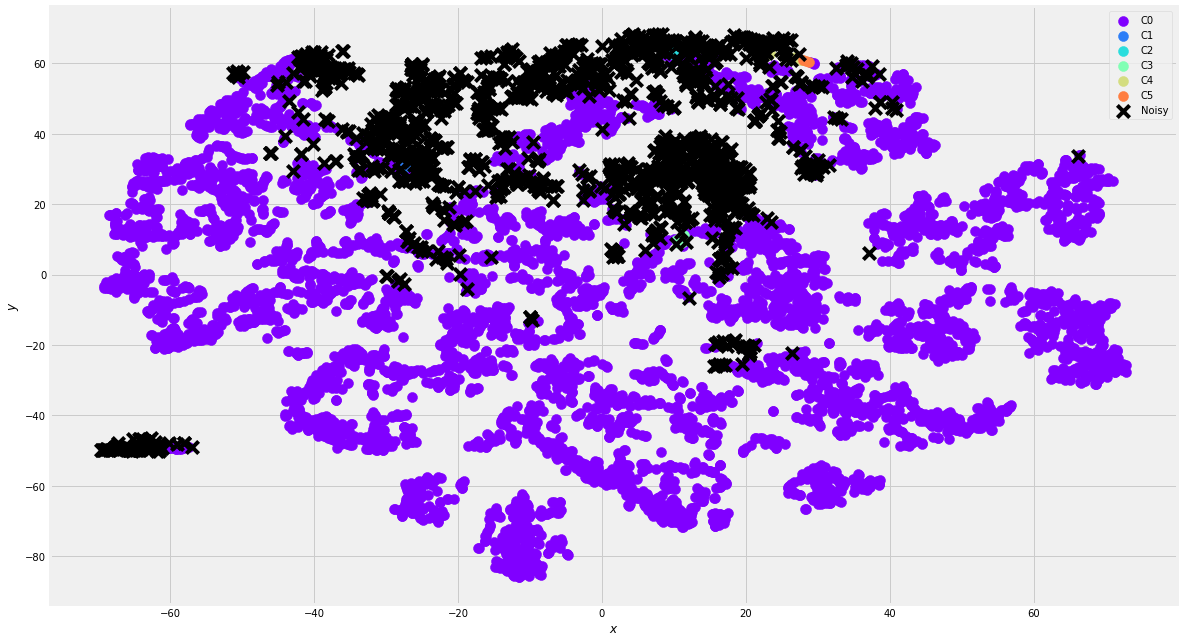

In [45]:
# Perform the clustering
dbscan = DBSCAN(eps=1400, min_samples=9, metric='euclidean')
Y_pred = dbscan.fit_predict(sdf)

print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred == -1)))

print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred, metric='euclidean')))
print('Calinski-Harabaz score: {:.3f}'.format(calinski_harabaz_score(dff, Y_pred)))

# Show the clustering results
fig, ax = plt.subplots(figsize=(18, 11))

n_clusters=np.max(np.unique(Y_pred)) + 1



for i in range(n_clusters):
    color = cm.rainbow(float(i) / n_clusters)
    ax.scatter(data_tsne[Y_pred == i, 0], data_tsne[Y_pred == i, 1], s=100, c=color,
                label='C{}'.format(i))

ax.scatter(data_tsne[Y_pred == -1, 0], data_tsne[Y_pred == -1, 1], marker='x', c='black', s=150, label='Noisy')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

### Interpretation

In conclusion, this method seems not a suitable one for our dataset. There are several reasons that DBSCAN is not effective when cluster high dimension data, and not useful when clusters have varying density.

## 3.3 Gaussian Mixture models

### Choose the number of cluster

In [60]:
bic = []
aic = []
n_max_components = 30
for n in range(5, n_max_components + 1):
    gm = GaussianMixture(
                     n_components = n+1,
                     n_init = 10,
                     max_iter = 100, random_state = 1000);
    gm.fit(X);
    bic.append(gm.bic(X));
    aic.append(gm.aic(X));

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=8, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=9, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=11, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=12, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=13, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=14, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=15, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=16, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=17, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=18, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=19, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=20, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=21, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=22, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=23, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=24, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=25, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=26, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=27, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=28, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=29, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=30, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=31, n_init=10,
                precisions_init=None, random_state=1000, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

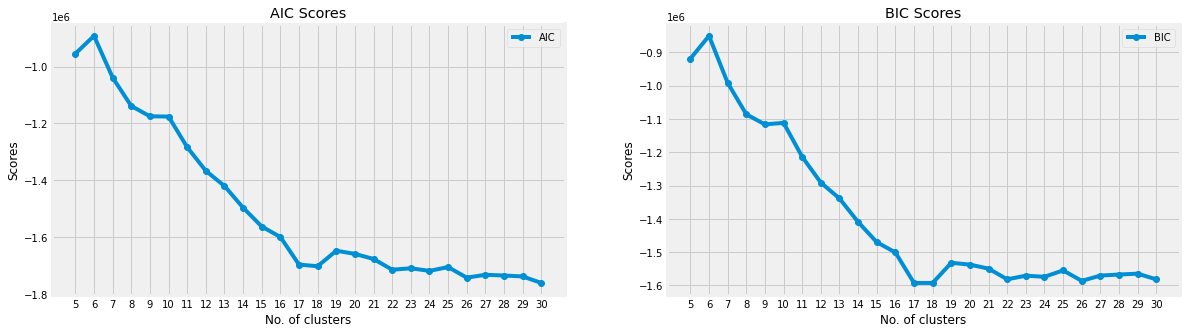

In [61]:
n_clusters=np.arange(5, 31);
fig, ax = plt.subplots(1, 2, figsize=(18,5));

plt.subplot(1, 2, 1);
plt.plot(n_clusters, aic,marker="o", label='AIC');
plt.title("AIC Scores");
plt.xticks(n_clusters);
plt.xlabel("No. of clusters");
plt.ylabel("Scores");
plt.legend();

plt.subplot(1, 2, 2);
plt.plot(n_clusters, bic, marker="o",label='BIC');
plt.title("BIC Scores");
plt.xticks(n_clusters);
plt.xlabel("No. of clusters");
plt.ylabel("Scores");
plt.legend();

plt.show();

According to the t-sne plot, we can see many varied shape and group of each cluster. Assumption of gaussian mixture model is that data points have been generated from a random process involving a a mixture of K probability distributions, that's why i think this approach can address problem.

The model with lowest AIC and BIC score is preferred. I choose number of cluster equal to 22.

### Results with chosen parameter

In [70]:
gm = GaussianMixture(n_components = 22)
gm.fit(sdf)
Y_pred = gm.fit_predict(sdf)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=22, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [71]:
len(Y_pred)

8637

In [72]:
tsne = TSNE(n_components=2, perplexity=40, random_state=1000)
data_tsne = tsne.fit_transform(sdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=X.index)
dff = pd.concat([X, df_tsne], axis=1)

In [73]:
df_gm = pd.DataFrame(Y_pred, columns = ["prediction"], index = X.index)
gmdff = pd.concat([dff, df_gm], axis =1)

<AxesSubplot:xlabel='x', ylabel='y'>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

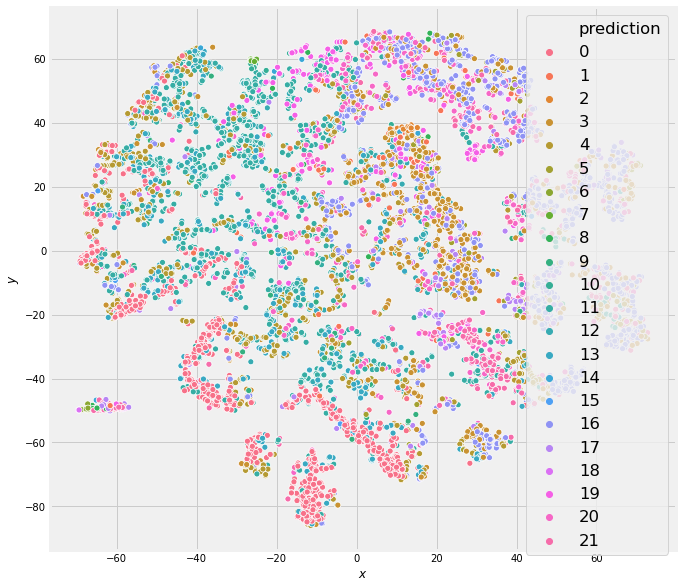

In [74]:
# Show the diagram
fig, ax = plt.subplots(figsize=(10, 10))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    palette=sns.color_palette("husl", 22),
                    hue='prediction',
                    sizes=(30, 400),
                    data=gmdff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

In [75]:
print('Weights:')
print(gm.weights_)

Weights:
[0.14625054 0.01061571 0.00185249 0.11561234 0.09715408 0.01228563
 0.00162093 0.00104203 0.00277075 0.00933138 0.00185248 0.1613499
 0.02708599 0.06510665 0.00138937 0.00150515 0.17573807 0.02494977
 0.00046312 0.03168943 0.05551928 0.0548149 ]


Value of these weights are close to frequency of data-pints per cluster.
Cluster of 15 has the large size and group of 9 followos the next.

### Post-Analysis Questions

#### Seperation and Cohesion

In [76]:
gmdff.prediction.value_counts()

16    1518
11    1373
0     1266
3     1002
4      839
13     562
21     491
20     478
19     272
12     233
17     216
5      106
1       91
9       82
8       24
10      16
2       16
6       14
15      13
14      12
7        9
18       4
Name: prediction, dtype: int64

In [77]:
W=gm.predict_proba(sdf)

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 0')

No handles with labels found to put in legend.


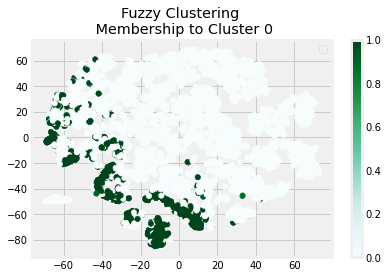

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 1')

No handles with labels found to put in legend.


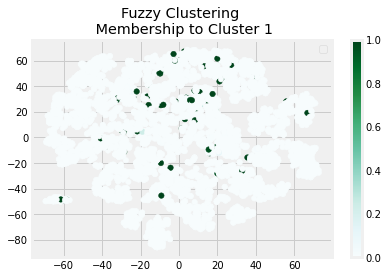

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 2')

No handles with labels found to put in legend.


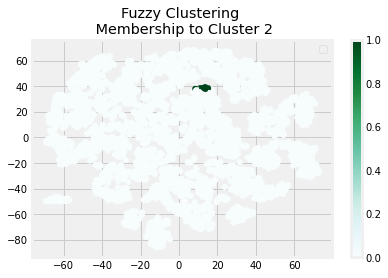

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 3')

No handles with labels found to put in legend.


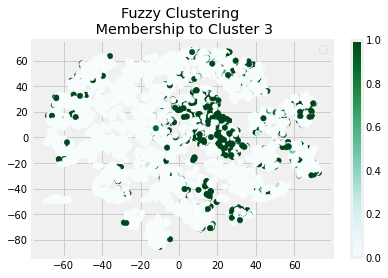

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 4')

No handles with labels found to put in legend.


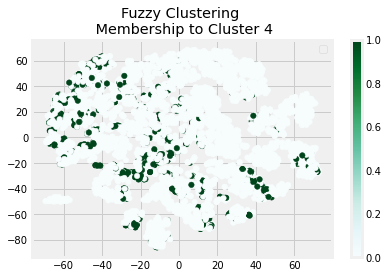

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 5')

No handles with labels found to put in legend.


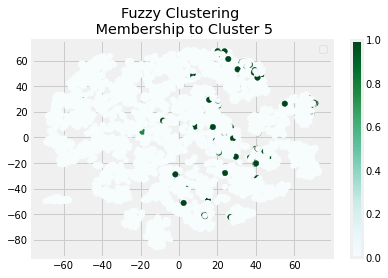

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 6')

No handles with labels found to put in legend.


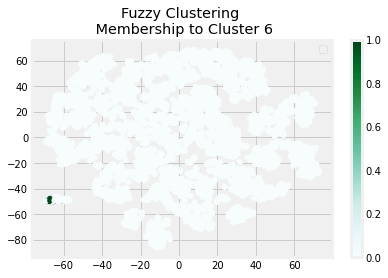

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 7')

No handles with labels found to put in legend.


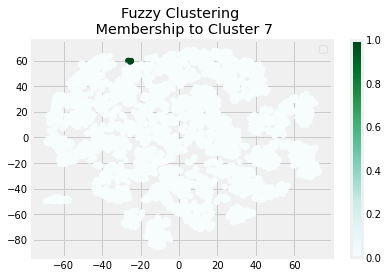

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 8')

No handles with labels found to put in legend.


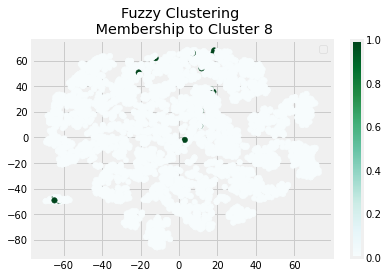

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 9')

No handles with labels found to put in legend.


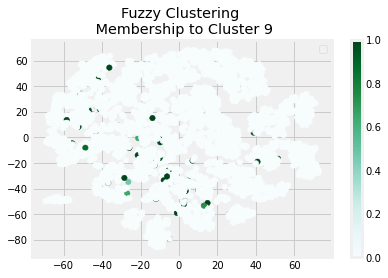

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 10')

No handles with labels found to put in legend.


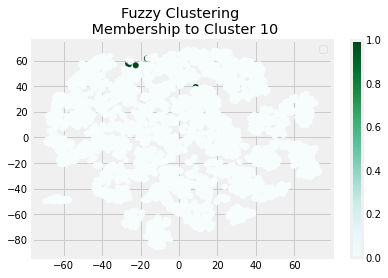

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 11')

No handles with labels found to put in legend.


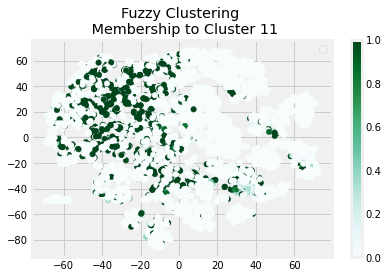

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 12')

No handles with labels found to put in legend.


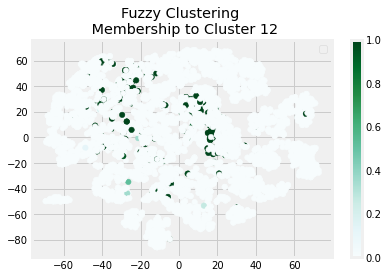

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 13')

No handles with labels found to put in legend.


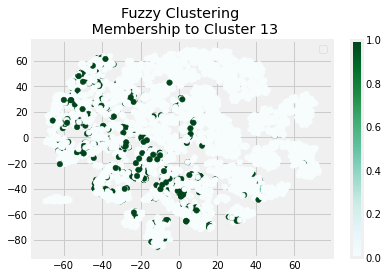

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 14')

No handles with labels found to put in legend.


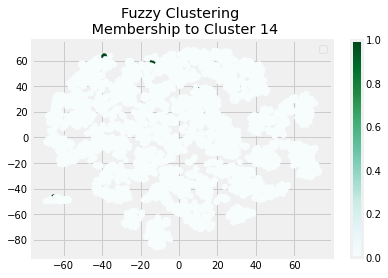

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 15')

No handles with labels found to put in legend.


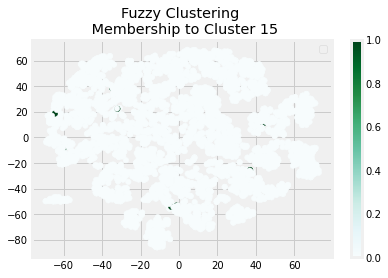

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 16')

No handles with labels found to put in legend.


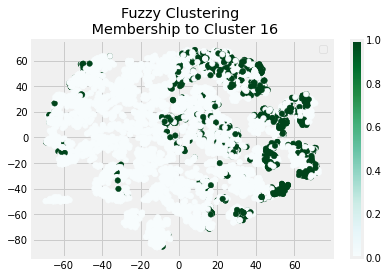

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 17')

No handles with labels found to put in legend.


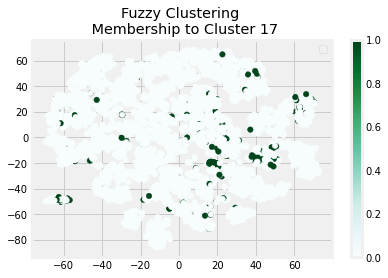

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 18')

No handles with labels found to put in legend.


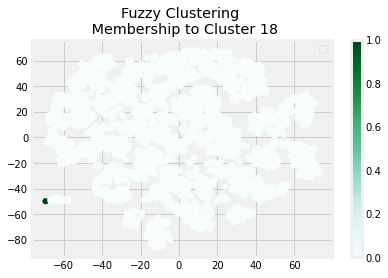

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 19')

No handles with labels found to put in legend.


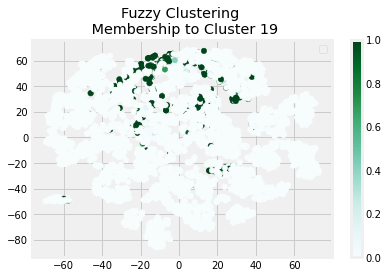

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 20')

No handles with labels found to put in legend.


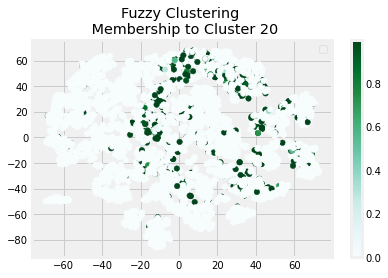

Text(0.5, 1.0, 'Fuzzy Clustering \n Membership to Cluster 21')

No handles with labels found to put in legend.


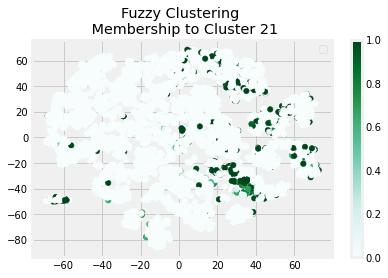

In [78]:
for i in range(0,22):
    #Create a column with cluster i membership scores
    X['Cluster %s Membership Score'%str(i)]=W[:,i]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(dff["x"], dff["y"],
                 c=X['Cluster %s Membership Score'%str(i)], s=30, cmap="BuGn")
    plt.colorbar(points)       
    plt.title('Fuzzy Clustering \n Membership to Cluster %s'%str(i))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

As shown in the fuzzy clustering membership score for each cluster,  it seems like Gaussian mixture model did not really detect the underlying cluster. The reason is that clusters contain more than 1000 points is not cohesive with other points in the same cluster. Also, even though there are some spaces between group of points from the t-sne plot, and it fail to clearly cluster the model.

#### Cluster Attributes

In [79]:
gmdff.prediction.value_counts()

16    1518
11    1373
0     1266
3     1002
4      839
13     562
21     491
20     478
19     272
12     233
17     216
5      106
1       91
9       82
8       24
10      16
2       16
6       14
15      13
14      12
7        9
18       4
Name: prediction, dtype: int64

In [91]:
gmdff.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster 0 Membership Score', 'Cluster 1 Membership Score',
       'Cluster 2 Membership Score', 'Cluster 3 Membership Score',
       'Cluster 4 Membership Score', 'Cluster 5 Membership Score',
       'Cluster 6 Membership Score', 'Cluster 7 Membership Score',
       'Cluster 8 Membership Score', 'Cluster 9 Membership Score',
       'Cluster 10 Membership Score', 'Cluster 11 Membership Score',
       'Cluster 12 Membership Score', 'Cluster 13 Membership Score',
       'Cluster 14 Membership Score', 'Cluster 15 Membership Score',
       'Cluster 16 Membership Score', 'Cluster 17 Membership Score',
       'Cluster 1

In [92]:
gmdff =gmdff[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'prediction']]

I want to compare customer group 11, 14, and 21 because they have less overlapping points.

In [94]:
gmdff_0 = gmdff[gmdff["prediction"] == 0]
pca_0 = PCA(n_components=17, random_state=1000)
Y_0 = pca_0.fit_transform(gmdff_0)

In [95]:
np.round(pca_0.explained_variance_ratio_, 3)

array([0.886, 0.104, 0.008, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

The first component explains almost 88.6% of the total variance, and second large component explains about 18%.

In [96]:
pca_0.components_[0]
pca_0.components_[1]

array([ 1.39335077e-03, -4.50006145e-06,  3.91935029e-02,  6.93889390e-18,
        3.91935029e-02,  0.00000000e+00, -1.26807902e-05, -3.76158192e-37,
       -1.00065175e-05,  0.00000000e+00,  0.00000000e+00,  3.56459997e-04,
        9.97083237e-01,  5.24411182e-02,  7.70722659e-04,  1.59299566e-05,
        1.55006314e-04,  0.00000000e+00])

array([ 4.57832630e-02,  6.60836114e-05,  5.71586659e-01,  0.00000000e+00,
        5.71586659e-01,  1.05879118e-22,  1.18727116e-04, -3.08148791e-33,
        1.22227960e-04,  0.00000000e+00,  0.00000000e+00,  3.69379378e-03,
       -7.56155858e-02,  5.81920308e-01,  1.08911954e-02,  1.00597364e-04,
        8.45136686e-05,  0.00000000e+00])

In [97]:
np.max(pca_0.components_[0])
np.max(pca_0.components_[1])

0.9970832366041167

0.5819203078301108

The limit of credit has a weight of 0.997 in eigenvector 0 which compose all of the eigenvector. That means that the minimum amout of payments will be considered most strongly in creating principal component 0.

From these, this cluster targets a group of customers who have high credit limit.

In [140]:
gmdff_21 = gmdff[gmdff["prediction"] ==21]
pca_21 = PCA(n_components=17, random_state=1000)
Y_21 = pca_21.fit_transform(gmdff_21)

In [141]:
np.round(pca_21.explained_variance_ratio_, 3)

array([0.515, 0.412, 0.03 , 0.019, 0.017, 0.008, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

The first component explains almost 51.5% of the total variance, the second component explains about 41%.

In [142]:
pca_21.components_[0]
pca_21.components_[1]

array([ 3.52321112e-01,  1.11022302e-16,  6.38007344e-03,  3.46944695e-18,
        6.38007344e-03,  1.34565797e-01, -1.69120773e-05,  0.00000000e+00,
       -1.69589086e-05,  9.57263158e-06,  2.54438597e-04, -9.18966887e-05,
        4.35915836e-01,  6.79517613e-02,  8.14272889e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

array([ 4.09453116e-01, -0.00000000e+00,  1.88823703e-02, -0.00000000e+00,
        1.88823703e-02,  2.08087368e-01,  4.50670734e-06, -0.00000000e+00,
        2.01031042e-06,  1.90141954e-05,  3.85680715e-04,  1.02155403e-04,
        6.61965392e-01,  1.30619221e-01, -5.77126489e-01, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

In [143]:
np.max(pca_21.components_[0])
np.max(pca_21.components_[1])

0.814272889171302

0.6619653923034692

The minimum payment amount has a weight of 0.81 in eigenvector 0 which is comparatively higher than all of the other and the credit limit has a weight of 0.43, but there are negative weight in the components in the eigen vector.  That means that the minimum payment amount will be considered most strongly in creating principal component 0.

From these, this customer group indicates a medium group of customers tend to increase credit limits to follow up on their minimum payments.

In [159]:
gmdff_4 = gmdff[gmdff["prediction"] == 4]
pca_4 = PCA(n_components=17, random_state=1000)
Y_4 = pca_4.fit_transform(gmdff_4)

In [160]:
np.round(pca_4.explained_variance_ratio_, 3)

array([0.738, 0.163, 0.058, 0.036, 0.004, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

The first component explains almost 88% of the total variance, the second component explains about 10%

In [161]:
pca_4.components_[0]
pca_4.components_[1]

array([ 2.24468143e-02, -8.33786636e-07,  7.42062488e-02,  7.42062488e-02,
        2.16840434e-19, -0.00000000e+00,  1.91395321e-05,  1.91395321e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  4.67082578e-04,
        9.88702189e-01,  1.04534338e-01, -4.83118641e-03,  2.33567584e-05,
       -0.00000000e+00, -0.00000000e+00])

array([ 1.23829039e-01,  2.59130874e-05,  5.38103854e-01,  5.38103854e-01,
        6.93889390e-18,  0.00000000e+00,  6.12654634e-05,  6.12654634e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.71033102e-03,
       -1.48552015e-01,  6.16931875e-01,  5.36177051e-02,  4.06331032e-05,
        0.00000000e+00,  0.00000000e+00])

In [162]:
np.max(pca_4.components_[0])
np.max(pca_4.components_[1])

0.9887021887756714

0.6169318747308786

The limit of credit has a weight of 0.98 in eigenvector 0 which is comparatively much higher than all of the other attribute weights in this eigenvector. That means that limit of credit will be considered most strongly in creating principal component 0. The purchases and payments has a weight of 0.6 in eigenvector1.

From these, this customer group indicates a large group of customers tend to increase credit limits to follow up on their spending habits.

I uses pca to analyze each clusters, but most of them have high weight in limit of credit at eigen vector 0, and for eigenvector 1, balance, payments, and cash in advance have a high weight.

#### Cluster Distance

In [163]:
dist_mat = squareform(pdist(gm.means_))

dist_df = pd.DataFrame(data = dist_mat, columns = sorted(gmdff.prediction.unique()))
dist_df

0             1             2             3             4   \
0       0.000000   7311.679172  36260.212595   3779.201687   1970.499474   
1    7311.679172      0.000000  29706.125438   4243.421638   5964.565219   
2   36260.212595  29706.125438      0.000000  32785.199896  35257.430413   
3    3779.201687   4243.421638  32785.199896      0.000000   3093.009276   
4    1970.499474   5964.565219  35257.430413   3093.009276      0.000000   
5    4937.685984   3955.642875  32099.631630   1673.718782   4230.766749   
6   28217.626503  26352.782354  41361.529951  27532.170449  27877.343424   
7   59594.708527  54409.486575  46687.312303  57963.358446  58299.324476   
8   11884.149845   5767.678865  27625.320805   8783.571668  10662.291542   
9    2140.861127   5639.985547  34778.422051   2946.909262    971.718252   
10  38149.004437  33012.019241  33222.534412  36648.370545  36821.839072   
11   4058.858723   4660.511645  34032.371596   3818.495746   2477.101476   
12   6266.463047   2912.455236  31245.164184   4494.034154   5004.903708   
13   1960.921301   5932.267813  35138.912767   3248.900064    727.727308   
14  16252.985168   9251.827348  23272.220254  13373.741159  14793.438229   
15   1440.860569   6146.570688  35404.678107   3176.306115   1324.015822   
16   3328.667699   5299.471840  34164.097779   1793.544782   2765.245393   
17   2936.991124   5095.945187  33830.129537   1894.306722   2894.998987   
18  61505.995999  59388.434571  66273.343158  60861.026142  61148.235121   
19   8558.103045   3277.035524  30796.709066   6281.374505   7054.926686   
20   4355.217244   4268.776173  33605.367074   2564.226542   3077.336041   
21   3638.228060   5593.024975  34697.484483   3155.549165   3338.982091   

              5             6             7             8             9   ...  \
0    4937.685984  28217.626503  59594.708527  11884.149845   2140.861127  ...   
1    3955.642875  26352.782354  54409.486575   5767.678865   5639.985547  ...   
2   32099.631630  41361.529951  46687.312303  27625.320805  34778.422051  ...   
3    1673.718782  27532.170449  57963.358446   8783.571668   2946.909262  ...   
4    4230.766749  27877.343424  58299.324476  10662.291542    971.718252  ...   
5       0.000000  27269.533544  57770.790522   7823.470772   4062.518224  ...   
6   27269.533544      0.000000  62088.176223  22960.443662  28071.304530  ...   
7   57770.790522  62088.176223      0.000000  54386.464647  57678.065435  ...   
8    7823.470772  22960.443662  54386.464647      0.000000  10600.619969  ...   
9    4062.518224  28071.304530  57678.065435  10600.619969      0.000000  ...   
10  36411.289287  44115.114445  23458.008618  33226.642370  36245.495458  ...   
11   4489.113959  27704.732082  56203.215467   9604.828050   2226.195656  ...   
12   4755.927215  27563.838908  53826.088905   8334.375335   4360.637343  ...   
13   4367.217600  28059.918660  58025.641114  10791.807614    665.766247  ...   
14  12722.313317  26143.070015  47988.379023   7510.447756  14427.522305  ...   
15   4268.954695  27717.859748  58469.390871  10813.809531   1349.353686  ...   
16   2365.662577  27242.184356  59039.876297   9198.284475   3080.829863  ...   
17   2779.163855  26559.026688  58354.424159   9306.155389   2719.647410  ...   
18  60552.318008  33371.186432  79698.763243  55454.907277  61348.389930  ...   
19   5790.612048  25455.922002  53847.916653   5380.786415   6949.089230  ...   
20   2633.173275  26858.314049  57692.980735   8169.965161   3320.837535  ...   
21   3711.575054  25395.196882  58804.921395   8981.293206   3641.955470  ...   

              12            13            14            15            16  \
0    6266.463047   1960.921301  16252.985168   1440.860569   3328.667699   
1    2912.455236   5932.267813   9251.827348   6146.570688   5299.471840   
2   31245.164184  35138.912767  23272.220254  35404.678107  34164.097779   
3    4494.034154   3248.900064  13373.741159   3176.306115   1793.544782   
4    5004.903708    7

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'colormap of cmap=RdYlGn_r')

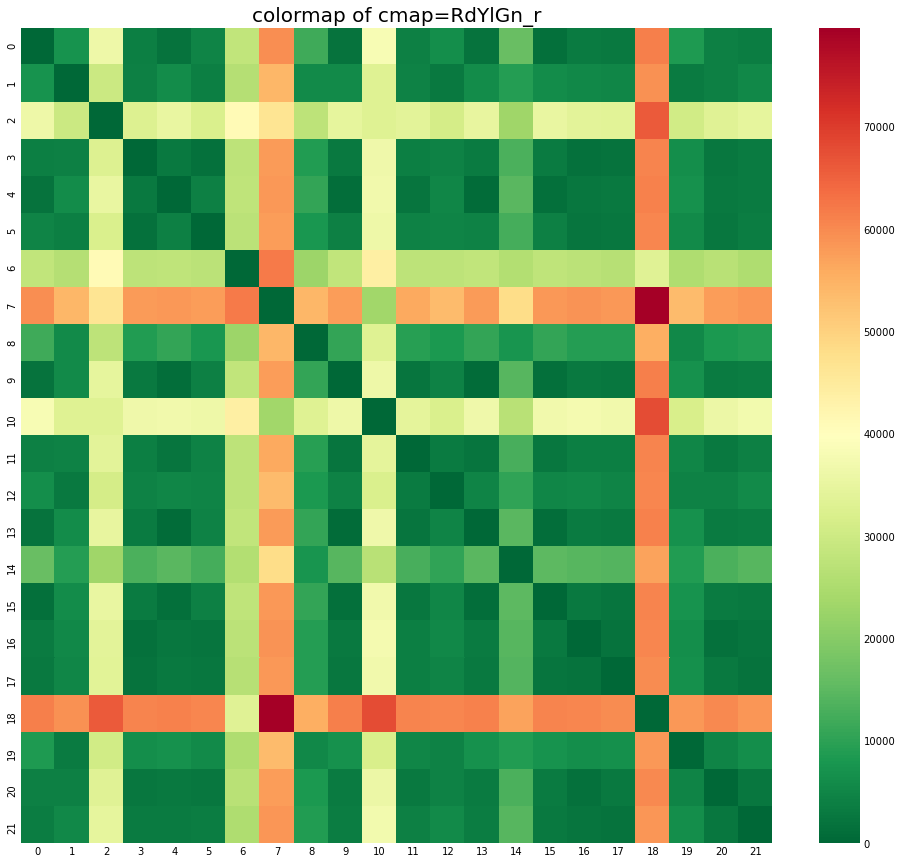

In [164]:
plt.figure(figsize=(15,15))
sns.heatmap(dist_df, cmap='RdYlGn_r')

plt.title('colormap of cmap=RdYlGn_r', fontsize=20)

plt.show()

gm.means_ are centroids of each cluster.
From the heatmap plot, cluster 11 to cluster 17 are pretty close. And group of 7 and 10 are relatively far from other clusters.

# 4. Source

- James Melton					|																		Dec 10, 2020, et al. “COVID-19 Drives a Surge in Online Holiday Shopping.” Digital Commerce 360, 10 Dec. 2020, www.digitalcommerce360.com/article/coronavirus-impact-online-retail/.

- McEntee										Editor, Beth, et al. “Who's Who: Understanding Your Business with Customer Segmentation.” Inside Intercom, 15 Sept. 2020, www.intercom.com/blog/customer-segmentation/. 

- Anders Drachen                            Anders Drachen, and Anders Drachen. “Introducing Clustering I: Behavioral Profiling for Game Analytics.” GameAnalytics, 5 Nov. 2020, gameanalytics.com/blog/introducing-clustering-behavioral-profiling-gameanalytics/.  